## Datathon Project : Predict Future Sales by CO2

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Í∏∞Ï¥à Ï≤òÎ¶¨

In [1]:
# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨, Î™®Îç∏ Íµ¨Ï∂ï, ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Î™®ÎìàÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
import gc  # PythonÏùò Í∞ÄÎπÑÏßÄ Ïª¨Î†âÌÑ∞ Í¥ÄÎ†® Î™®ÎìàÎ°ú, Î©îÎ™®Î¶¨ Í¥ÄÎ¶¨Î•º ÏúÑÌï¥ Í∞ùÏ≤¥ ÏÇ≠Ï†úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï†úÏñ¥Ìï† Ïàò ÏûàÏäµÎãàÎã§.
import itertools  # Î∞òÎ≥µ Í∞ÄÎä•Ìïú Í∞ùÏ≤¥Î°úÎ∂ÄÌÑ∞ Ï°∞Ìï©, ÏàúÏó¥ Îì± Îã§ÏñëÌïú Î∞òÎ≥µÏûêÎ•º ÏÉùÏÑ±ÌïòÎäî Ïú†Ìã∏Î¶¨Ìã∞ Î™®ÎìàÏûÖÎãàÎã§.
import matplotlib.pyplot as plt  # Ï†ïÏ†Å/Ïï†ÎãàÎ©îÏù¥ÏÖò/Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏãúÍ∞ÅÌôîÎ•º ÏßÄÏõêÌïòÎäî matplotlibÏùò ÌïµÏã¨ ÏãúÍ∞ÅÌôî ÎèÑÍµ¨ÏûÖÎãàÎã§.
import numpy as np  # Îã§Ï∞®Ïõê Î∞∞Ïó¥Í≥º ÌñâÎ†¨ Ïó∞ÏÇ∞, Îã§ÏñëÌïú ÏàòÌïô Ìï®Ïàò Ï†úÍ≥µÏùÑ ÏúÑÌïú ÏàòÏπò Í≥ÑÏÇ∞ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÍ≥º ÏãúÎ¶¨Ï¶à Í∞ùÏ≤¥Î•º Í∏∞Î∞òÏúºÎ°ú Ìïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏö© ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
import seaborn as sns  # matplotlibÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìïú Í≥†Í∏â ÌÜµÍ≥Ñ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
import os  # Ïö¥ÏòÅÏ≤¥Ï†úÏôÄ ÏÉÅÌò∏ÏûëÏö©ÌïòÍ∏∞ ÏúÑÌïú Î™®ÎìàÎ°ú, ÌååÏùº Í≤ΩÎ°ú ÌÉêÏÉâ Îì± OS ÏùòÏ°¥ Í∏∞Îä•ÏùÑ ÏßÄÏõêÌï©ÎãàÎã§.
import xgboost  # Î®∏Ïã†Îü¨ÎãùÏö© XGBoost ÎùºÏù¥Î∏åÎü¨Î¶¨ (Ï£ºÎ°ú ÌöåÍ∑Ä, Î∂ÑÎ•ò, Îû≠ÌÇπÏóê ÏÇ¨Ïö©).
import warnings  # Í≤ΩÍ≥† Î©îÏãúÏßÄ ÌïÑÌÑ∞ÎßÅ Î∞è Ï†úÏñ¥Î•º ÏúÑÌïú Î™®ÎìàÏûÖÎãàÎã§.
import lightgbm as lgbm  # LightGBM: Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ Í∏∞Î∞ò Î®∏Ïã†Îü¨Îãù ÌîÑÎ†àÏûÑÏõåÌÅ¨ÏûÖÎãàÎã§.
import lightgbm as lgb  # LightGBMÏùÑ Îã§Î•∏ Î≥ÑÏπ≠ÏúºÎ°ú Ï§ëÎ≥µ ÏûÑÌè¨Ìä∏ (Î≥¥ÌÜµÏùÄ ÌïòÎÇòÎßå ÏûÑÌè¨Ìä∏Ìï¥ÎèÑ Ï∂©Î∂ÑÌï©ÎãàÎã§).
import ctypes  # C Ïñ∏Ïñ¥ Ìò∏Ìôò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò Ïô∏Î∂Ä DLL/Í≥µÏú† ÎùºÏù¥Î∏åÎü¨Î¶¨ Ìò∏Ï∂ú Ïãú ÏÇ¨Ïö©ÎêòÎäî Î™®ÎìàÏûÖÎãàÎã§.
from sklearn.linear_model import LinearRegression  # ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌïòÎäî ÌÅ¥ÎûòÏä§ÏûÖÎãàÎã§.

warnings.filterwarnings("ignore")  # Í≤ΩÍ≥† Î©îÏãúÏßÄÎ•º Î¨¥ÏãúÌïòÏó¨ Ï∂úÎ†• Í≤∞Í≥ºÍ∞Ä ÏßÄÏ†ÄÎ∂ÑÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ïÌï©ÎãàÎã§.

In [2]:
# Ï•¨ÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏö© Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_train = pd.read_csv('./sales_train.csv')
df_categories = pd.read_csv("./item_categories.csv")
df_items = pd.read_csv("./items-translated.csv", encoding='cp1252') # Î≤àÏó≠ ÌõÑ ÌååÏùºÏùÑ input Ìè¥ÎçîÏóê Ïò¨Î†§ÎëêÏóàÏäµÎãàÎã§. ÌååÏùºÎ™Ö: items_translated
df_shops = pd.read_csv("./shops_graded_v2.csv", encoding='cp1252') # Îß§Ïû• Îì±Í∏â Ï∂îÍ∞ÄÌïú ÌååÏùº(v2)ÏùÑ input Ìè¥ÎçîÏóê Ïò¨Î†§ÎëêÏóàÏäµÎãàÎã§. ÌååÏùºÎ™Ö: shops_graded_v2
df_test = pd.read_csv("./test.csv")
calendar = pd.read_csv("./calendar.csv")

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_train['date'] = pd.to_datetime(df_train['date'], format='%d.%m.%Y') 
calendar['date'] = pd.to_datetime(calendar['date'])

df_train = pd.merge(df_train, df_items, on='item_id', how='inner')
df_train = pd.merge(df_train, df_categories, on='item_category_id', how='inner')
df_train = pd.merge(df_train, df_shops, on='shop_id', how='inner')
df_test = pd.merge(df_test, df_items, on='item_id', how='inner')
df_test = pd.merge(df_test, df_categories, on='item_category_id', how='inner')
df_test = pd.merge(df_test, df_shops, on='shop_id', how='inner')
df_train = pd.merge(df_train, calendar, on='date', how='left')

In [4]:
# category, shop Ï§ëÎ∂ÑÎ•ò Ï∂îÍ∞Ä (12Ï¥à ÏÜåÏöî)
df_train['city'] = df_train['shop_name'].str.split(' ').str[0]
df_train['sub_category'] = df_train['item_category_name'].str.split(' ').str[0]
# Ï§ëÎ∂ÑÎ•òÎ™Ö Ï†ïÎ¶¨ ‚Üí 13Í∞ú
df_train['sub_category'] = df_train['sub_category'].replace({'Pure' : 'Carrier', 'Clean' : 'Carrier', 'Elements': 'Batteries', 'Payment' : 'Gift Card', 'Service' : 'Tickets', 'Android' : 'Games', 'Mac' : 'Games', 'Game' : 'Games'})
# cityÎ™Ö Ï†ïÎ¶¨
df_train['city'] = df_train['city'].replace({'!' : 'Yakutsk', 'Exit' : 'Other', 'N.' : 'NizhnyNovgorod', 'SPb' : 'SanktPetersburg', 'Digital' : 'Online'})
# ÏõêÌôî Ï∂îÍ∞Ä
df_train['total_amount'] = df_train['item_price'] * df_train['item_cnt_day'] # ÌåêÎß§ Í∏àÏï°
df_train['krw_amount'] = df_train['total_amount'] * 18 # Íµ≠ÎÇ¥ Î≥¥Í≥†Ïö© ÏõêÌôî ÌëúÏãú, krw_amountÎ°ú ÌëúÏãú
df_train = df_train.rename({'total_amount':'rub_amount'}, axis = 1)  # Í∏∞Ï°¥ ÌåêÎß§Í∏àÏï°ÏùÄ rub_amountÎ°ú ÌëúÏãú

In [5]:
# date Í¥ÄÎ†® Ïª¨Îüº Ï∂îÍ∞Ä # Î≥¥Í≥†Ïö©Ïù¥ÎØÄÎ°ú ÏòàÏ∏°ÏóêÎäî Î∂àÌïÑÏöî Ïãú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§. (7Ï¥à ÏÜåÏöî)
# df_train['date'] = pd.to_datetime(df_train['date'], format='%d.%m.%Y') (merge ÏßÅÏ†ÑÏóê ÏôÑÎ£å)
df_train['year'] =  pd.to_datetime(df_train['date']).apply(lambda x : x.year)
df_train['month'] = pd.to_datetime(df_train['date']).apply(lambda x : x.month)
df_train['day'] = pd.to_datetime(df_train['date']).apply(lambda x : x.day)
df_train['year_month'] = df_train['date'].dt.to_period('M')

In [6]:
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

                         item_name_translated  item_category_id  \
0                             SCENE 2012 (BD)                37   
1    DEEP PURPLE  The House Of Blue Light  LP                58   
2    DEEP PURPLE  The House Of Blue Light  LP                58   
3    DEEP PURPLE  Who Do You Think We Are  LP                58   
4  DEEP PURPLE 30 Very Best Of 2CD (√ê¬§√ê¬∏?√ê¬º.)                56   

                   item_category_name                           shop_name  \
0                   Cinema - Blu -Ray  Yaroslavl shopping center "Altair"   
1                       Music - vinyl                 Moscow TRK "Atrium"   
2                       Music - vinyl                 Moscow TRK "Atrium"   
3                       Music - vinyl                 Moscow TRK "Atrium"   
4  Music - CD of corporate production                 Moscow TRK "Atrium"   

   ... holiday  weekend       city sub_category rub_amount  krw_amount  year  \
0  ...       1        0  Yaroslavl       Cinema     999.00     17982.0  2013   
1  ...       1        0     Moscow        Music     899.00     16182.0  2013   
2  ...       0        1     Moscow        Music    -899.00    -16182.0  2013   
3  ...       0        1     Moscow        Music    1709.05     30762.9  2013   
4  ...       0        0     Moscow        Music    1099.00     19782.0  2013   

   month  day  year_month  
0      1    2     2013-01  
1      1    3     2013-01  
2      1    5     2013-01  
3      1    6     2013-01  
4      1   15     2013-01  

[5 rows x 21 columns]

### Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [7]:
df_train[df_train.duplicated() == True]

date  date_block_num  shop_id  item_id  item_price  \
76962   2013-01-05               0       54    20130       149.0   
1435367 2014-02-23              13       50     3423       999.0   
1496766 2014-03-23              14       21     3423       999.0   
1671873 2014-05-01              16       50     3423       999.0   
1866340 2014-07-12              18       25     3423       999.0   
2198566 2014-12-31              23       42    21619       499.0   

         item_cnt_day                              item_name_translated  \
76962             1.0                      SCIENTIFIC CHARODEA (region)   
1435367           1.0  Far Cry 3 (Classics) [Xbox 360, Russian version]   
1496766           1.0  Far Cry 3 (Classics) [Xbox 360, Russian version]   
1671873           1.0  Far Cry 3 (Classics) [Xbox 360, Russian version]   
1866340           1.0  Far Cry 3 (Classics) [Xbox 360, Russian version]   
2198566           1.0                              THE MAN OF RAIN (BD)   

         item_category_id item_category_name                      shop_name  \
76962                  40       Cinema - DVD  Khimki shopping center "mega"   
1435367                23   Games - Xbox 360           Tyumen TEC "Goodwin"   
1496766                23   Games - Xbox 360       Moscow MTRC "Afers Mall"   
1671873                23   Games - Xbox 360           Tyumen TEC "Goodwin"   
1866340                23   Games - Xbox 360            Moscow TRK "Atrium"   
2198566                37  Cinema - Blu -Ray         SPb TK "Nevsky Center"   

         ... holiday  weekend             city sub_category rub_amount  \
76962    ...       0        1           Khimki       Cinema      149.0   
1435367  ...       1        1           Tyumen        Games      999.0   
1496766  ...       0        1           Moscow        Games      999.0   
1671873  ...       1        0           Tyumen        Games      999.0   
1866340  ...       0        1           Moscow        Games      999.0   
2198566  ...       0        0  SanktPetersburg       Cinema      499.0   

         krw_amount  year  month  day  year_month  
76962        2682.0  2013      1    5     2013-01  
1435367     17982.0  2014      2   23     2014-02  
1496766     17982.0  2014      3   23     2014-03  
1671873     17982.0  2014      5    1     2014-05  
1866340     17982.0  2014      7   12     2014-07  
2198566      8982.0  2014     12   31     2014-12  

[6 rows x 21 columns]

In [8]:
# Ï§ëÎ≥µ Ï†úÍ±∞ # 6Í∞ú Í±¥
df_train.drop_duplicates(inplace=True)

In [9]:
# Í∏∞ÌÉÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Í≤ÄÌÜ† Î∂ÄÎ∂Ñ ÏûÖÎ†•

<Axes: xlabel='item_price'>

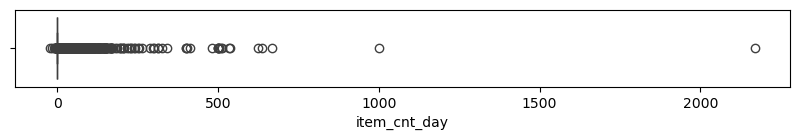

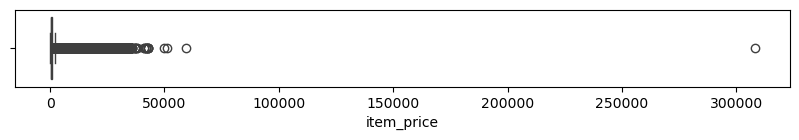

In [10]:
plt.figure(figsize=(10,1))
sns.boxplot(x='item_cnt_day', data=df_train)

plt.figure(figsize=(10,1))
sns.boxplot(x='item_price', data=df_train)

In [11]:
df_train[df_train.item_cnt_day > 500].head()

date  date_block_num  shop_id  item_id  item_price  \
1573253 2014-04-22              15       27     8057      1200.0   
1708207 2014-06-28              17       25    20949         5.0   
2048518 2014-10-02              21       12     9242      1500.0   
2067669 2014-10-09              21       55    19437       899.0   
2326930 2015-01-15              24       12    20949         4.0   

         item_cnt_day                               item_name_translated  \
1573253         502.0                                  iTunes 1500 ??√ê¬±.   
1708207         501.0  Corporate package T-shirt 1C Interest white (3...   
2048518         512.0  Ticket "Igromir 2014" (for one day (separately...   
2067669         508.0  Middle Earth: Shadows of Mordor [PC, Digital V...   
2326930        1000.0  Corporate package T-shirt 1C Interest white (3...   

         item_category_id                    item_category_name  \
1573253                32  Payment cards (cinema, music, games)   
1708207                71    Gifts - bags, albums, rugs d/mouse   
2048518                 8                      Tickets (number)   
2067669                31                     Games PC - number   
2326930                71    Gifts - bags, albums, rugs d/mouse   

                                              shop_name  ... holiday  weekend  \
1573253  Moscow shopping center "Mega white cottage II"  ...       0        0   
1708207                             Moscow TRK "Atrium"  ...       0        1   
2048518                       Online store of emergency  ...       0        0   
2067669                      Digital warehouse 1-online  ...       0        0   
2326930                       Online store of emergency  ...       0        0   

           city sub_category rub_amount  krw_amount  year  month  day  \
1573253  Moscow    Gift Card   602400.0  10843200.0  2014      4   22   
1708207  Moscow        Gifts     2505.0     45090.0  2014      6   28   
2048518  Online      Tickets   768000.0  13824000.0  2014     10    2   
2067669  Online        Games   456692.0   8220456.0  2014     10    9   
2326930  Online        Gifts     4000.0     72000.0  2015      1   15   

         year_month  
1573253     2014-04  
1708207     2014-06  
2048518     2014-10  
2067669     2014-10  
2326930     2015-01  

[5 rows x 21 columns]

In [12]:
df_train[df_train.item_price > 40000].head()

date  date_block_num  shop_id  item_id  item_price  \
885138  2013-09-17               8       12    11365     59200.0   
1006638 2013-10-24               9       12     7238     42000.0   
1163158 2013-12-13              11       12     6066    307980.0   
1488135 2014-03-20              14       25    13199     50999.0   
2143903 2014-11-20              22       12    14173     40900.0   

         item_cnt_day                              item_name_translated  \
885138            1.0                                    Shipping (EMS)   
1006638           1.0  UserGate Proxy & Firewall 6.X up to 100 sessions   
1163158           1.0                            Radmin 3 - 522 people.   
1488135           1.0             Collectible chess (Lord of the Rings)   
2143903           1.0       1C-Bitrix License: Site Management - Expert   

         item_category_id              item_category_name  \
885138                  9               Delivery of goods   
1006638                75  Programs - for home and office   
1163158                75  Programs - for home and office   
1488135                69             Gifts are souvenirs   
2143903                75  Programs - for home and office   

                         shop_name  ... holiday  weekend    city sub_category  \
885138   Online store of emergency  ...       0        0  Online     Delivery   
1006638  Online store of emergency  ...       0        0  Online     Programs   
1163158  Online store of emergency  ...       0        0  Online     Programs   
1488135        Moscow TRK "Atrium"  ...       0        0  Moscow        Gifts   
2143903  Online store of emergency  ...       0        0  Online     Programs   

        rub_amount  krw_amount  year  month  day  year_month  
885138     59200.0   1065600.0  2013      9   17     2013-09  
1006638    42000.0    756000.0  2013     10   24     2013-10  
1163158   307980.0   5543640.0  2013     12   13     2013-12  
1488135    50999.0    917982.0  2014      3   20     2014-03  
2143903    40900.0    736200.0  2014     11   20     2014-11  

[5 rows x 21 columns]

### EDA

In [13]:
year_amount = df_train.groupby('year')['krw_amount'].sum()
year_amount = pd.DataFrame(year_amount).reset_index()

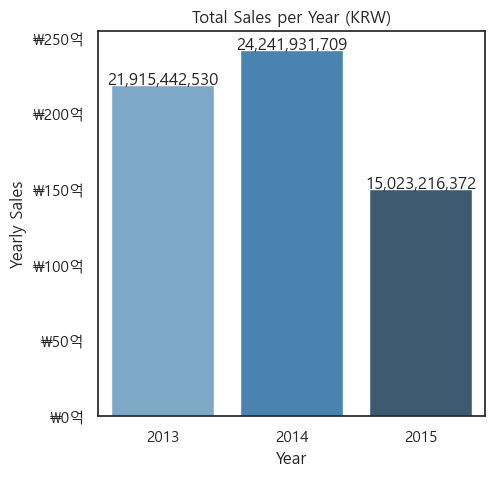

In [14]:
from matplotlib.ticker import FuncFormatter

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)

fig, ax = plt.subplots( figsize=(5,5) )
sns.barplot(data=year_amount, x= 'year', y='krw_amount', palette='Blues_d')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # Í∞ÄÎ°ú ÏúÑÏπò
            p.get_y() + p.get_height(),   # ÏÑ∏Î°ú ÏúÑÏπò
            f"{p.get_height():,.0f}",   # Í∞í + ÌëúÏãúÎ∞©Î≤ï ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ 
            ha = 'center' )   # Ï¢åÏö∞Ï†ïÎ†¨ Ï§ëÍ∞ÑÏúºÎ°ú

plt.xlabel('Year')
plt.ylabel('Yearly Sales')

plt.title('Total Sales per Year (KRW)')
plt.show()

In [15]:
month_amount = df_train.groupby('month')['krw_amount'].sum()
month_amount = pd.DataFrame(month_amount).reset_index()

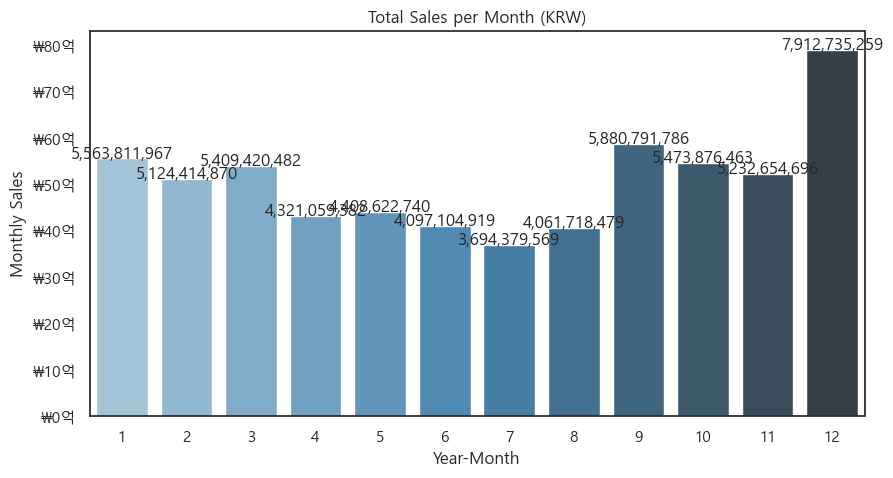

In [16]:
from matplotlib.ticker import FuncFormatter

# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)


fig, ax = plt.subplots( figsize=(10,5) )
sns.barplot(data=month_amount, x= 'month', y='krw_amount', palette='Blues_d')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # Í∞ÄÎ°ú ÏúÑÏπò
            p.get_y() + p.get_height(),   # ÏÑ∏Î°ú ÏúÑÏπò
            f"{p.get_height():,.0f}",   # Í∞í + ÌëúÏãúÎ∞©Î≤ï ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ 
            ha = 'center' )   # Ï¢åÏö∞Ï†ïÎ†¨ Ï§ëÍ∞ÑÏúºÎ°ú
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.title('Total Sales per Month (KRW)')
plt.show()

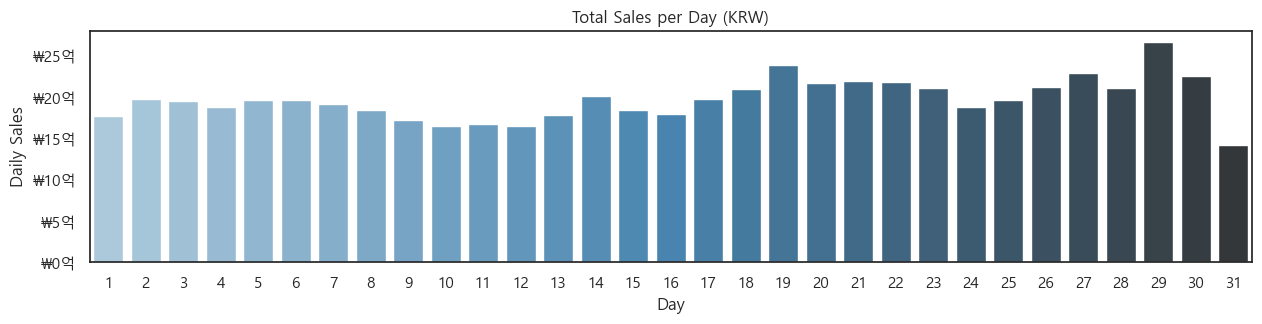

In [17]:
day_amount = df_train.groupby('day')['krw_amount'].sum()
day_amount = pd.DataFrame(day_amount).reset_index()

fig, ax = plt.subplots( figsize=(15,3) )
sns.barplot(data=day_amount, x= 'day', y='krw_amount', palette='Blues_d')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
plt.xlabel('Day')
plt.ylabel('Daily Sales')    
plt.title('Total Sales per Day (KRW)')
plt.show()

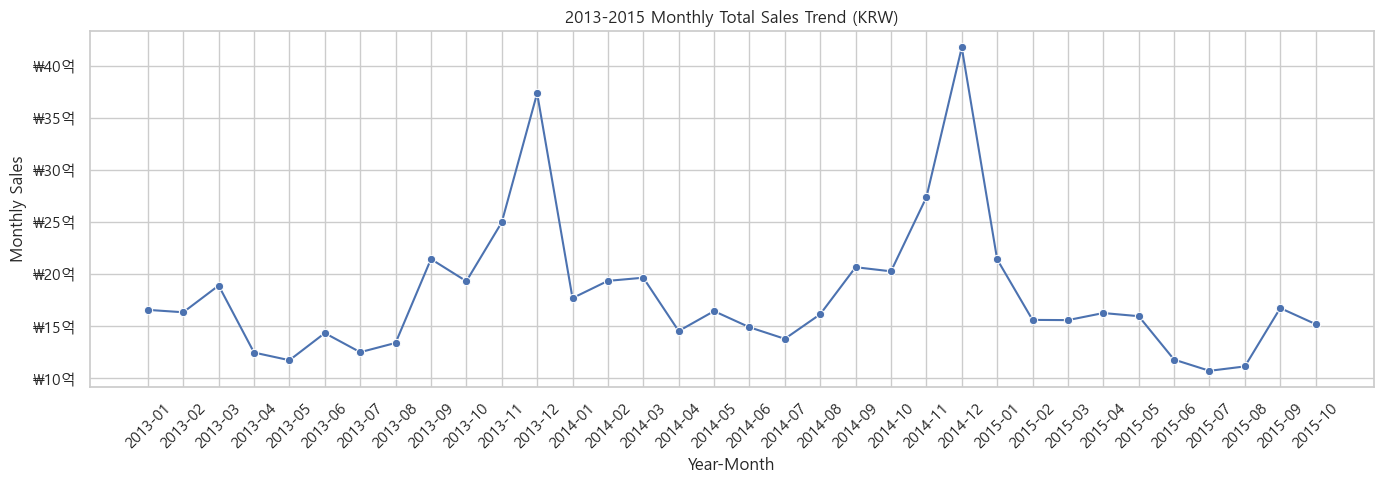

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# ÏõîÎ≥Ñ  ÌèâÍ∑† Îß§Ï∂ú Í≥ÑÏÇ∞
monthly_sales = df_train.groupby('year_month')['krw_amount'].sum()
monthly_sales = pd.DataFrame(monthly_sales).reset_index()

plt.figure(figsize=(14, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
# sns.set_style('whitegrid')
sns.lineplot(data=monthly_sales, x= monthly_sales['year_month'].astype(str), y='krw_amount', palette='Blues_d', marker = 'o')

plt.title('2013-2015 Monthly Total Sales Trend (KRW)')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖúÏùò ÏõîÎ≥Ñ Ïã§Ï†Å ÌôïÏù∏ (Ïã†ÏÉÅÌíà Ï∂úÏãú ÏòÅÌñ• Î∞è Ï£ºÏöî ÌåêÎß§Ïõî ÌôïÏù∏Ïö©)

total_item_sales = (
    df_train.groupby(['item_id', 'item_name_translated'])['krw_amount']
    .sum()
    .reset_index(name='total_sales')
)

# ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖú Ï∂îÏ∂ú
total_top_items = (
    total_item_sales
    .sort_values(['total_sales'], ascending=[False])
    # .groupby('year_month')
    .head(10)
    .reset_index(drop=True)
)

top_item_ids = total_top_items['item_id'].unique()
filtered = df_train[(df_train['item_id'].isin(top_item_ids))]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot = pd.pivot_table(
    filtered,
    index=['item_id', 'item_name_translated'],
    columns='year_month',
    values='krw_amount',
    aggfunc='sum',
    # fill_value=0
)

pivot = pivot.loc[total_top_items['item_id'].values] 


pivot

year_month                                                     2013-01  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...         NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                NaN   
16787   Some of us [PS3, Russian version]                          NaN   
3731    Grand Theft Auto V [PC, Russian subtitles]                 NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...         NaN   
17717   Acceptance of funds for 1C-Online                   1064322.00   
5823    Playstation Store replenishment of wallet: Paym...  3108209.04   

year_month                                                    2013-02  \
item_id item_name_translated                                            
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...        NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]               NaN   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...        NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]          NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]               NaN   
16787   Some of us [PS3, Russian version]                         NaN   
3731    Grand Theft Auto V [PC, Russian subtitles]                NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...        NaN   
17717   Acceptance of funds for 1C-Online                   1822086.0   
5823    Playstation Store replenishment of wallet: Paym...  3927942.0   

year_month                                                     2013-03  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...         NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                NaN   
16787   Some of us [PS3, Russian version]                          NaN   
3731    Grand Theft Auto V [PC, Russian subtitles]                 NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...         NaN   
17717   Acceptance of funds for 1C-Online                   3663305.82   
5823    Playstation Store replenishment of wallet: Paym...  4390398.00   

year_month                                                    2013-04  \
item_id item_name_translated                                            
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...        NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]               NaN   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...        NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]          NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]               NaN   
16787   Some of us [PS3, Russian version]                         NaN   
3731    Grand Theft Auto V [PC, Russian subtitles]                NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...        NaN   
17717   Acceptance of funds for 1C-Online                   1440666.0   
5823    Playstation Store replenishment of wallet: Paym...  4839352.2   

year_month                                                     2013-05  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...      

In [20]:
# 2013ÎÖÑ ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖúÏùò ÏõîÎ≥Ñ Ïã§Ï†Å ÌôïÏù∏ (Ïã†ÏÉÅÌíà Ï∂úÏãú ÏòÅÌñ• Î∞è Ï£ºÏöî ÌåêÎß§Ïõî ÌôïÏù∏Ïö©)

df_train['year'] = df_train['year'].astype(str)

# 2013 Îßå ÌïÑÌÑ∞ÎßÅ
yearly = df_train[df_train['year'] == '2013']

yearly_item_sales = (
    yearly.groupby(['item_id', 'item_name_translated'])['krw_amount']
    .sum()
    .reset_index(name='total_sales')
)

# Ïó∞Í∞Ñ ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖú Ï∂îÏ∂ú
yearly_top_items = (
    yearly_item_sales
    .sort_values(['total_sales'], ascending=[False])
    # .groupby('year_month')
    .head(10)
    .reset_index(drop=True)
)

top_item_ids = yearly_top_items['item_id'].unique()
filtered = df_train[(df_train['year'] == '2013') & (df_train['item_id'].isin(top_item_ids))]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot = pd.pivot_table(
    filtered,
    index=['item_id', 'item_name_translated'],
    columns='year_month',
    values='krw_amount',
    aggfunc='sum',
    # fill_value=0
)

pivot = pivot.loc[yearly_top_items['item_id'].values] 


pivot

year_month                                                      2013-01  \
item_id item_name_translated                                              
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...          NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                 NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]            NaN   
16787   Some of us [PS3, Russian version]                           NaN   
2808    Diablo III [PC, Jewel, Russian version]             15233022.00   
13490   Set √Ç¬´Sony PS3 Super Slim (500 Gb) (CECH-4008C)...  26786046.60   
7942    Xbox 360 250 ?? Kinect bundle Sports 2+Forza Ho...          NaN   
7938    Xbox 360 250 ?? + Kinect bundle √ê¬º√ê¬∞?√ê¬æ√ê¬≤√ê¬∞?+Da...  31081194.00   
13484   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? √Ç¬´Sony PS3 Super Slim (500 Gb) (...  23070388.14   
3331    FIFA 14 [PC, Russian version]                               NaN   

year_month                                                     2013-02  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]           NaN   
16787   Some of us [PS3, Russian version]                          NaN   
2808    Diablo III [PC, Jewel, Russian version]              9579830.4   
13490   Set √Ç¬´Sony PS3 Super Slim (500 Gb) (CECH-4008C)...  21522362.4   
7942    Xbox 360 250 ?? Kinect bundle Sports 2+Forza Ho...         NaN   
7938    Xbox 360 250 ?? + Kinect bundle √ê¬º√ê¬∞?√ê¬æ√ê¬≤√ê¬∞?+Da...  34014535.2   
13484   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? √Ç¬´Sony PS3 Super Slim (500 Gb) (...  10802052.0   
3331    FIFA 14 [PC, Russian version]                              NaN   

year_month                                                     2013-03  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]           NaN   
16787   Some of us [PS3, Russian version]                          NaN   
2808    Diablo III [PC, Jewel, Russian version]              8661843.0   
13490   Set √Ç¬´Sony PS3 Super Slim (500 Gb) (CECH-4008C)...  15854916.6   
7942    Xbox 360 250 ?? Kinect bundle Sports 2+Forza Ho...         NaN   
7938    Xbox 360 250 ?? + Kinect bundle √ê¬º√ê¬∞?√ê¬æ√ê¬≤√ê¬∞?+Da...  20912061.6   
13484   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? √Ç¬´Sony PS3 Super Slim (500 Gb) (...  12695839.2   
3331    FIFA 14 [PC, Russian version]                              NaN   

year_month                                                     2013-04  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]           NaN   
16787   Some of us [PS3, Russian version]                          NaN   
2808    Diablo III [PC, Jewel, Russian version]             10147572.0   
13490   Set √Ç¬´Sony PS3 Super Slim (500 Gb) (CECH-4008C)...  13937139.0   
7942    Xbox 360 250 ?? Kinect bundle Sports 2+Forza Ho...         NaN   
7938    Xbox 360 250 ?? + Kinect bundle √ê¬º√ê¬∞?√ê¬æ√ê¬≤√ê¬∞?+Da...   7873074.0   
13484   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? √Ç¬´Sony PS3 Super Slim (500 Gb) (...   8073441.0   
3331    FIFA 14 [PC, Russian version]                              NaN   

year_month                                                     2013-05  \
item_id item_name_translated                                             
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...         NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]                NaN   
3734    Grand Theft Auto V [Xbox

In [21]:
# 2014ÎÖÑ ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖúÏùò ÏõîÎ≥Ñ Ïã§Ï†Å ÌôïÏù∏ (Ïã†ÏÉÅÌíà Ï∂úÏãú ÏòÅÌñ• Î∞è Ï£ºÏöî ÌåêÎß§Ïõî ÌôïÏù∏Ïö©)

df_train['year'] = df_train['year'].astype(str)

# 2014 Îßå ÌïÑÌÑ∞ÎßÅ
yearly = df_train[df_train['year'] == '2014']

yearly_item_sales = (
    yearly.groupby(['item_id', 'item_name_translated'])['krw_amount']
    .sum()
    .reset_index(name='total_sales')
)

# Ïó∞Í∞Ñ ÏµúÍ≥† ÌåêÎß§Îüâ ÏïÑÏù¥ÌÖú Ï∂îÏ∂ú
yearly_top_items = (
    yearly_item_sales
    .sort_values(['total_sales'], ascending=[False])
    # .groupby('year_month')
    .head(10)
    .reset_index(drop=True)
)

top_item_ids = yearly_top_items['item_id'].unique()
filtered = df_train[(df_train['year'] == '2014') & (df_train['item_id'].isin(top_item_ids))]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot = pd.pivot_table(
    filtered,
    index=['item_id', 'item_name_translated'],
    columns='year_month',
    values='krw_amount',
    aggfunc='sum',
    # fill_value=0
)

pivot = pivot.loc[yearly_top_items['item_id'].values] 


pivot

year_month                                                       2014-01  \
item_id item_name_translated                                               
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...  1.314063e+08   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                  NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...           NaN   
3928    InFAMOUS: The second son [PS4, Russian version]              NaN   
16790   One of us. Updated version [PS4, Russian version]            NaN   
7807    Watch_Dogs. Special Edition [PS4, Russian version]           NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]         4.136263e+07   
5672    PS4: Game controller wireless black (Dualshock ...  1.612170e+07   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]    2.790259e+07   

year_month                                                       2014-02  \
item_id item_name_translated                                               
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...  4.640710e+08   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                  NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...           NaN   
3928    InFAMOUS: The second son [PS4, Russian version]              NaN   
16790   One of us. Updated version [PS4, Russian version]            NaN   
7807    Watch_Dogs. Special Edition [PS4, Russian version]           NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]         2.168951e+07   
5672    PS4: Game controller wireless black (Dualshock ...  2.763054e+07   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]    1.805377e+07   

year_month                                                       2014-03  \
item_id item_name_translated                                               
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...  2.492137e+08   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                  NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...           NaN   
3928    InFAMOUS: The second son [PS4, Russian version]     8.957799e+07   
16790   One of us. Updated version [PS4, Russian version]            NaN   
7807    Watch_Dogs. Special Edition [PS4, Russian version]           NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]         1.745851e+07   
5672    PS4: Game controller wireless black (Dualshock ...  2.003260e+07   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]    1.383806e+07   

year_month                                                       2014-04  \
item_id item_name_translated                                               
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...  1.525261e+08   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? Sony PS4 (500 Gb) Black (CUH-110...           NaN   
3733    Grand Theft Auto V [PS4, Russian subtitles]                  NaN   
13405   ?√ê¬æ√ê¬º√ê¬ø√ê¬ª√ê¬µ√ê¬∫? "Microsoft Xbox One 500GB (Day O...           NaN   
3928    InFAMOUS: The second son [PS4, Russian version]     3.520218e+07   
16790   One of us. Updated version [PS4, Russian version]            NaN   
7807    Watch_Dogs. Special Edition [PS4, Russian version]           NaN   
3732    Grand Theft Auto V [PS3, Russian subtitles]         1.315326e+07   
5672    PS4: Game controller wireless black (Dualshock ...  1.174429e+07   
3734    Grand Theft Auto V [Xbox 360, Russian subtitles]    1.145415e+07   

year_month                                                       2014-05  \
item_id item_name_translated                                               
6675    Sony PlayStation 4 (500 Gb) Black (CUH-1008A/11...  1.410142e+08   
13443   ?√ê¬æ√ê¬º√ê¬ø√ê¬

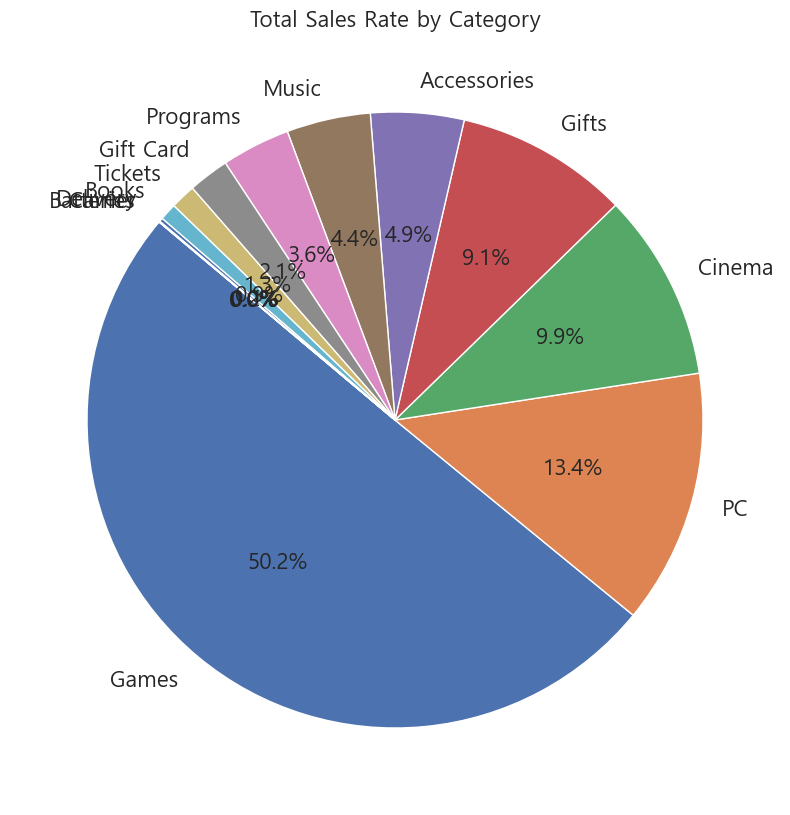

In [22]:
import matplotlib.pyplot as plt

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï¥ù ÌåêÎß§Îüâ Ìï©Í≥Ñ Í≥ÑÏÇ∞
category_sales = df_train.groupby('sub_category')['krw_amount'].sum().sort_values(ascending=False)

# colors = sns.color_palette('Blues_r') 

# ÌååÏù¥Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 10))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    # colors = colors,
    textprops={'fontsize': 16}
)
plt.title('Total Sales Rate by Category', fontsize=16)
plt.show()

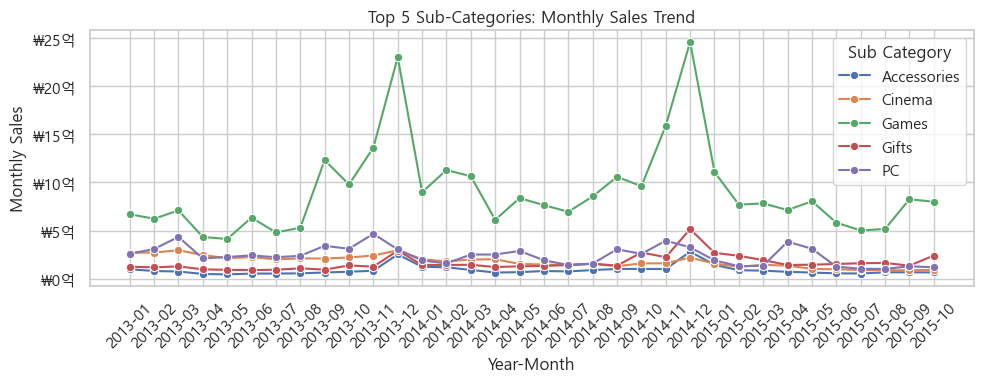

In [23]:
# Ïó∞-Ïõî Ïª¨Îüº Ï∂îÍ∞Ä (Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò)
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

category_trend = (
    df_train
    .groupby(['year_month', 'sub_category'])['krw_amount']
    .sum()
    .reset_index(name='total_sales')
)

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 4))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
# sns.set_style('whitegrid')

# ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú ÏòàÏãú
top_categories = (
    category_trend.groupby('sub_category')['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
filtered = category_trend[category_trend['sub_category'].isin(top_categories)]

# ÎùºÏù∏ÌîåÎ°Ø
sns.lineplot(
    data=filtered,
    x='year_month',
    y='total_sales',
    hue='sub_category',
    marker='o'
)

plt.title('Top 5 Sub-Categories: Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.legend(title='Sub Category')
plt.tight_layout()
plt.show()

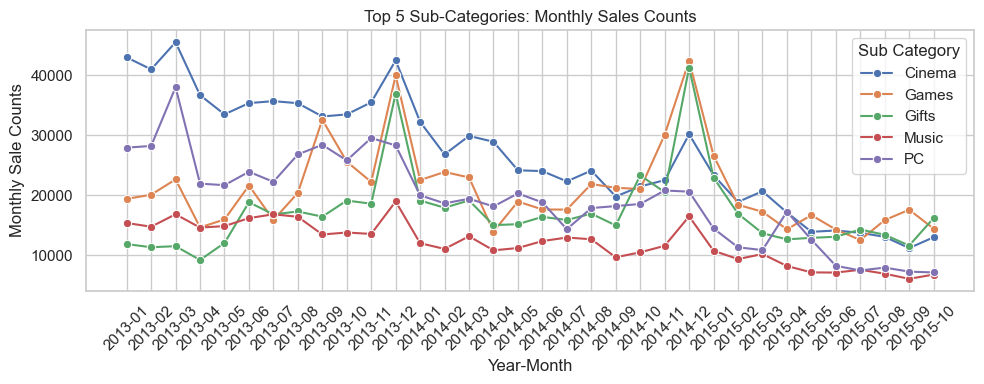

In [24]:
# Ïó∞-Ïõî Ïª¨Îüº Ï∂îÍ∞Ä (Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò)
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

category_trend = (
    df_train
    .groupby(['year_month', 'sub_category'])['item_cnt_day']
    .sum()
    .reset_index(name='total_sales')
)


# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

# ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú ÏòàÏãú
top_categories = (
    category_trend.groupby('sub_category')['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
filtered = category_trend[category_trend['sub_category'].isin(top_categories)]

# ÎùºÏù∏ÌîåÎ°Ø
sns.lineplot(
    data=filtered,
    x='year_month',
    y='total_sales',
    hue='sub_category',
    marker='o'
)

plt.title('Top 5 Sub-Categories: Monthly Sales Counts')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sale Counts')
plt.legend(title='Sub Category')
plt.tight_layout()
plt.show()

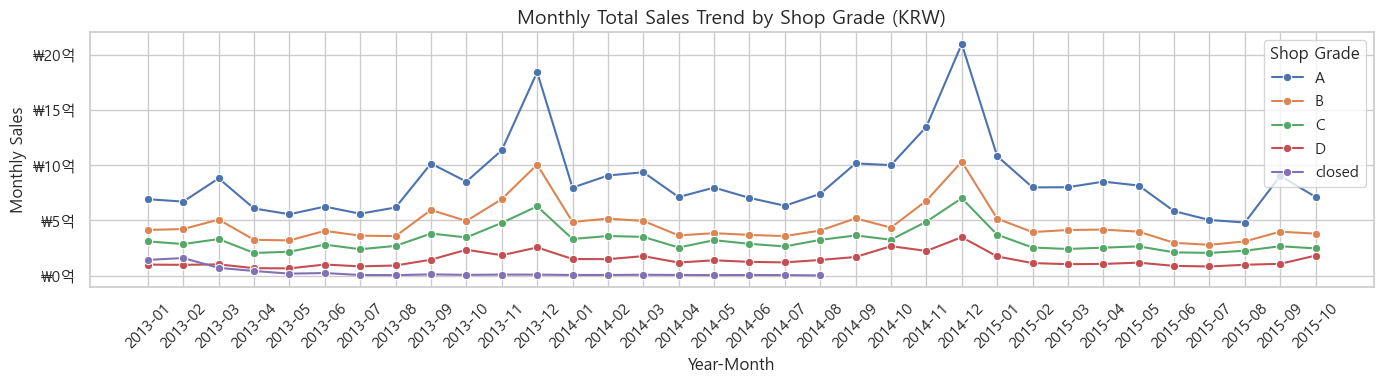

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Convert Period to Timestamp if necessary
if df_train['year_month'].dtype.name == 'period[M]':
    df_train['year_month'] = df_train['year_month'].dt.to_timestamp()

# Grouped monthly total sales
monthly_avg_sales = (
    df_train.groupby(['shop_grade', 'year_month'])['krw_amount']
    .sum()
    .reset_index()
)

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)

# Visualization
plt.figure(figsize=(14, 4))
# sns.set_style("whitegrid")
sns.lineplot(data=monthly_avg_sales, x='year_month', y='krw_amount', hue='shop_grade', marker='o')

plt.title('Monthly Total Sales Trend by Shop Grade (KRW)', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
plt.xticks(rotation=45)
plt.legend(title='Shop Grade', loc=1)
plt.tight_layout()
plt.show()

In [26]:
# Îß§Ïû•Î≥Ñ Ï¥ù ÌåêÎß§ÎüâÍ≥º Îì±Í∏â, Ïù¥Î¶Ñ Ìè¨Ìï®
shop_sales_ranked = (
    df_train
    .groupby(['shop_id', 'shop_name', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='total_sales')
    .sort_values(by='total_sales', ascending=False)
    .reset_index(drop=True)
)

# ÏàúÏúÑ Ïª¨Îüº Ï∂îÍ∞Ä (1ÏúÑÎ∂ÄÌÑ∞)
shop_sales_ranked['rank'] = shop_sales_ranked.index + 1

shop_sales_ranked.head()

shop_id                                    shop_name shop_grade  \
0       31          Moscow shopping center "Semenovsky"          A   
1       25                          Moscow TRK "Atrium"          A   
2       28  Moscow shopping center "Mega Teply Stan" II          A   
3       42                       SPb TK "Nevsky Center"          A   
4       54                Khimki shopping center "mega"          A   

    total_sales  rank  
0  4.233906e+09     1  
1  3.896632e+09     2  
2  2.875434e+09     3  
3  2.734498e+09     4  
4  2.554911e+09     5

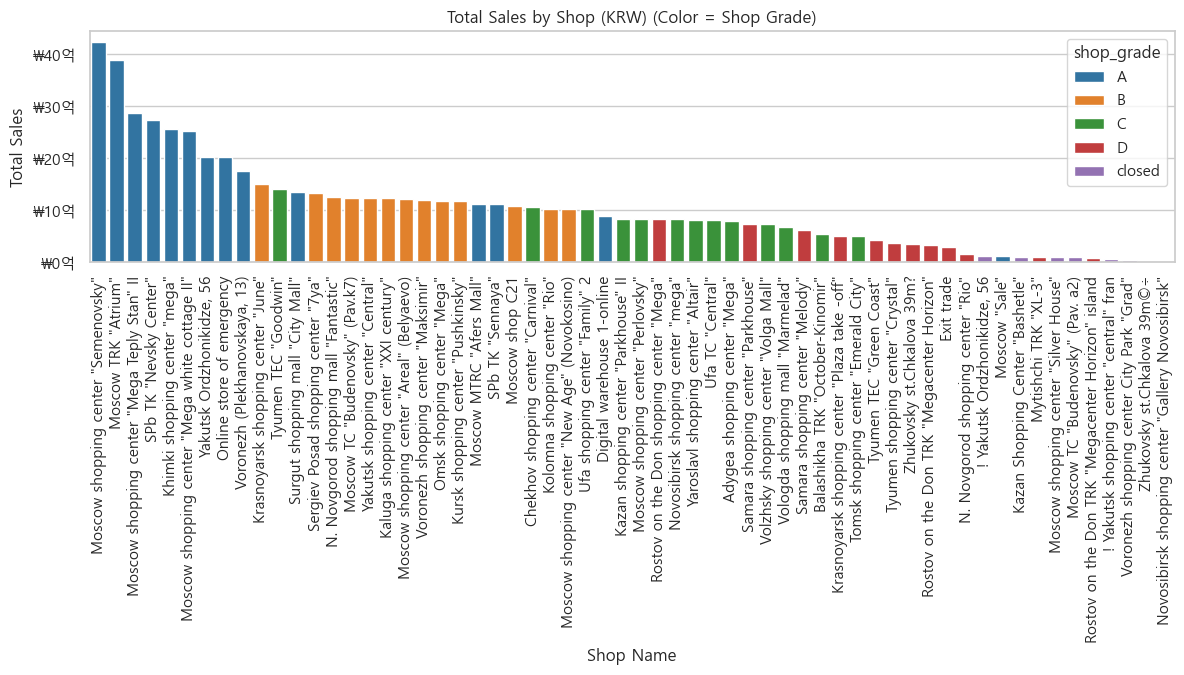

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)

plt.figure(figsize=(14, 3))
# sns.set_style('whitegrid')

# ÌåîÎ†àÌä∏ ÏßÄÏ†ï (Îì±Í∏âÎ≥Ñ ÏÉâÏÉÅ)
palette = {'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'closed': '#9467bd'}

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (x: shop_name, y: Ï¥ù ÌåêÎß§Îüâ, hue: Îì±Í∏â)
barplot = sns.barplot(
    data=shop_sales_ranked,
    x='shop_name',
    y='total_sales',
    hue='shop_grade',
    dodge=False,
    palette=palette
)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
plt.xticks(rotation=90)

plt.title('Total Sales by Shop (KRW) (Color = Shop Grade)')
plt.xlabel('Shop Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### 2015ÎÖÑ 10Ïõî Îß§Ï∂ú Î∂ÑÏÑù

In [28]:
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

                         item_name_translated  item_category_id  \
0                             SCENE 2012 (BD)                37   
1    DEEP PURPLE  The House Of Blue Light  LP                58   
2    DEEP PURPLE  The House Of Blue Light  LP                58   
3    DEEP PURPLE  Who Do You Think We Are  LP                58   
4  DEEP PURPLE 30 Very Best Of 2CD (√ê¬§√ê¬∏?√ê¬º.)                56   

                   item_category_name                           shop_name  \
0                   Cinema - Blu -Ray  Yaroslavl shopping center "Altair"   
1                       Music - vinyl                 Moscow TRK "Atrium"   
2                       Music - vinyl                 Moscow TRK "Atrium"   
3                       Music - vinyl                 Moscow TRK "Atrium"   
4  Music - CD of corporate production                 Moscow TRK "Atrium"   

   ... holiday  weekend       city sub_category rub_amount  krw_amount  year  \
0  ...       1        0  Yaroslavl       Cinema     999.00     17982.0  2013   
1  ...       1        0     Moscow        Music     899.00     16182.0  2013   
2  ...       0        1     Moscow        Music    -899.00    -16182.0  2013   
3  ...       0        1     Moscow        Music    1709.05     30762.9  2013   
4  ...       0        0     Moscow        Music    1099.00     19782.0  2013   

  month  day  year_month  
0     1    2     2013-01  
1     1    3     2013-01  
2     1    5     2013-01  
3     1    6     2013-01  
4     1   15     2013-01  

[5 rows x 21 columns]

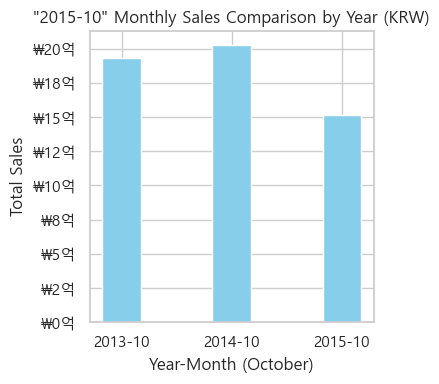

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÎπÑÍµêÌï† Ïó∞ÎèÑ 10Ïõî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
compare_years = ['2013-10', '2014-10', '2015-10']
df_train['year_month'] = df_train['date'].dt.to_period('M')
annual_sales = df_train[df_train['year_month'].astype(str).isin(compare_years)]

# Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í≥ÑÏÇ∞
annual_summary = annual_sales.groupby('year_month')['krw_amount'].sum().sort_index()
annual_summary_reset = pd.DataFrame(annual_summary).reset_index()
index = range(len(annual_summary_reset))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
# sns.set_style('whitegrid')
plt.figure(figsize=(4,4))

# Îç∞Ïù¥ÌÑ∞ Ïû¨Ï†ïÎ†¨ Î∞è Ïù∏Îç±Ïä§ ÏÉùÏÑ±
bar_width = 0.35
index = range(len(annual_summary_reset))
# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)

# ÌïúÌôî Îß§Ï∂ú ÎßâÎåÄ
plt.bar(index, annual_summary_reset['krw_amount'], bar_width, label='KRW Amount', color='skyblue')

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï (2013-10, 2014-10, 2015-10)
plt.xticks(index, annual_summary_reset['year_month'])
plt.xlabel('Year-Month (October)')
plt.ylabel('Total Sales')
plt.title('"2015-10" Monthly Sales Comparison by Year (KRW)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
# plt.legend()

plt.tight_layout()
plt.show()

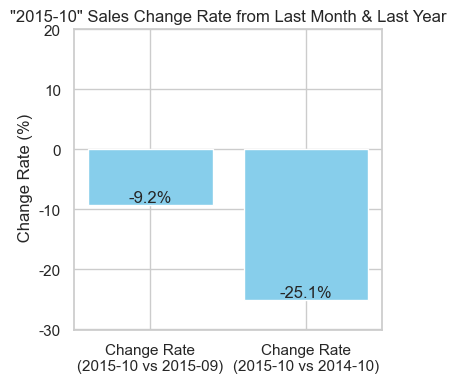

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Í∞Å ÎπÑÍµêÎ≥Ñ % Î≥ÄÌôîÏú® Í≥ÑÏÇ∞ (Î£®Î∏î, ÌïúÌôî Ìï©Í≥Ñ Í∏∞Ï§Ä)
# rub_amountÏôÄ krw_amount Ìï©Ïπú Ï¥ù Îß§Ï∂ú Í∏∞Ï§ÄÏúºÎ°ú Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî krw_amount Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏãú ÏûëÏÑ±

compare_months = ['2015-10', '2015-09', '2014-10']
monthly_sales = df_train[df_train['year_month'].astype(str).isin(compare_months)]
monthly_summary = monthly_sales.groupby('year_month')[['rub_amount', 'krw_amount']].sum().sort_index()
month_rate = (monthly_summary.loc['2015-10', 'krw_amount'] / monthly_summary.loc['2015-09', 'krw_amount'] - 1) * 100
year_month_rate = (monthly_summary.loc['2015-10', 'krw_amount'] / monthly_summary.loc['2014-10', 'krw_amount'] - 1) * 100

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
rates = pd.Series([ month_rate, year_month_rate],
                  index=['Change Rate\n(2015-10 vs 2015-09)', 'Change Rate\n(2015-10 vs 2014-10)'])

plt.figure(figsize=(4,4))
bars = plt.bar(rates.index, rates.values, color='skyblue')

plt.ylabel(' Change Rate (%)')
plt.title('"2015-10" Sales Change Rate from Last Month & Last Year') # RubÏù¥ÎÇò KRWÏù¥ÎÇò ÎπÑÏú®ÏùÄ Í∞ôÏùå
plt.ylim(min(rates.values.min() - 5, -20), max(rates.values.max() + 5, 20))

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

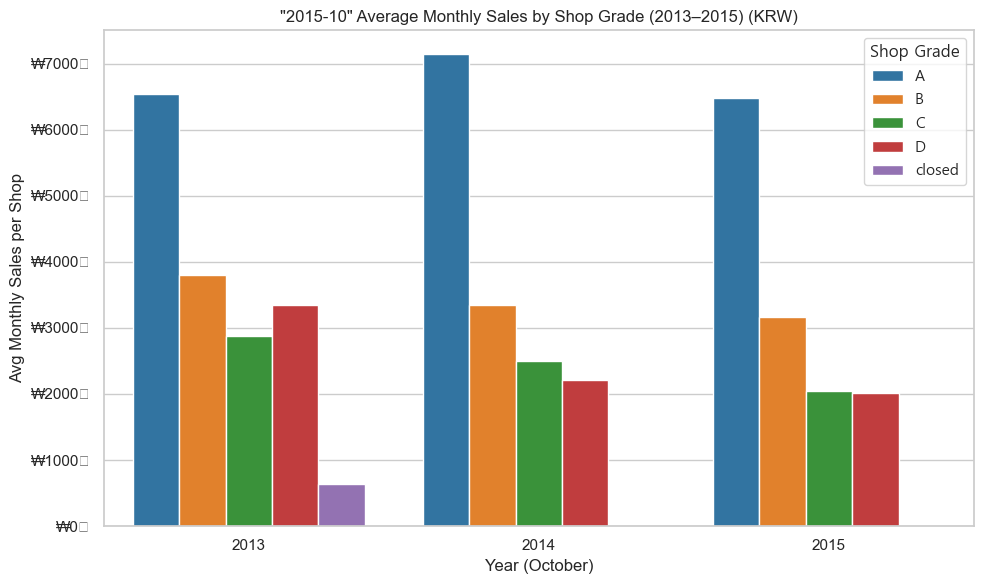

üìä 2015ÎÖÑ 10Ïõî ÌèâÍ∑† *ÏõîÍ∞Ñ ÌåêÎß§Îüâ* Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†

[Îì±Í∏â A]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): 64,719,294
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -9.4%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -1.1%

[Îì±Í∏â B]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): 31,615,291
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -5.4%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -16.9%

[Îì±Í∏â C]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): 20,479,842
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -18.0%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -28.8%

[Îì±Í∏â D]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): 20,112,689
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -9.4%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -39.8%

[Îì±Í∏â closed]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): nan
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month

# 2. 10ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['month'] == 10]

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
monthly_sales = (
    october
    .groupby(['year', 'shop_id', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')  # Ìïú Îß§Ïû•Ïùò 10Ïõî Ï¥ù ÌåêÎß§Îüâ
)

# 4. Ïó∞ÎèÑÎ≥Ñ, Îì±Í∏âÎ≥Ñ ÌèâÍ∑† Îß§Ïû•Îãπ ÏõîÍ∞Ñ ÌåêÎß§Îüâ
october_grouped = (
    monthly_sales
    .groupby(['year', 'shop_grade'])['monthly_sales']
    .mean()
    .reset_index(name='avg_sales')
)

# 5. ÌîºÎ≤óÌïòÏó¨ Ï¶ùÍ∞êÎ•† Í≥ÑÏÇ∞
oct_pivot = october_grouped.pivot(index='shop_grade', columns='year', values='avg_sales').reset_index()
oct_pivot['2015_vs_2013'] = ((oct_pivot[2015] - oct_pivot[2013]) / oct_pivot[2013] * 100).round(1)
oct_pivot['2015_vs_2014'] = ((oct_pivot[2015] - oct_pivot[2014]) / oct_pivot[2014] * 100).round(1)

# 6. ÏãúÍ∞ÅÌôîÏö© long-form Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
plot_df = pd.melt(
    oct_pivot,
    id_vars='shop_grade',
    value_vars=[2013, 2014, 2015],
    var_name='year',
    value_name='avg_sales'
)

# 7. Îì±Í∏â ÏàúÏÑúÏôÄ ÏÉâÏÉÅ Ï†ïÏùò
grade_order = ['A', 'B', 'C', 'D', 'closed']
palette = {'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'closed': '#9467bd'}

# 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
# sns.set_style('whitegrid')
sns.barplot(
    data=plot_df,
    x='year',
    y='avg_sales',
    hue='shop_grade',
    palette=palette,
    hue_order=grade_order
)

# Ï≤úÎßåÏõê Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_1k(x, pos):
    return f'‚Ç©{x * 1e-4:.0f}Îßå'  # M for ÎßåÏõê Îã®ÏúÑÎ°ú Í∞ÑÏ£º

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

plt.title('"2015-10" Average Monthly Sales by Shop Grade (2013‚Äì2015) (KRW)')
plt.ylabel('Avg Monthly Sales per Shop')
plt.xlabel('Year (October)')
plt.legend(title='Shop Grade')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_1k))
plt.tight_layout()
plt.show()

# 9. ÏΩòÏÜî Ï∂úÎ†•
print("üìä 2015ÎÖÑ 10Ïõî ÌèâÍ∑† *ÏõîÍ∞Ñ ÌåêÎß§Îüâ* Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†\n")
for i, row in oct_pivot.iterrows():
    grade = row['shop_grade']
    sales_2015 = row[2015]
    change_13 = row['2015_vs_2013']
    change_14 = row['2015_vs_2014']

    print(f"[Îì±Í∏â {grade}]")
    print(f"- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 10Ïõî): {sales_2015:,.0f}")
    print(f"- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_14 >= 0 else ''}{change_14}%")
    print(f"- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_13 >= 0 else ''}{change_13}%")
    print()


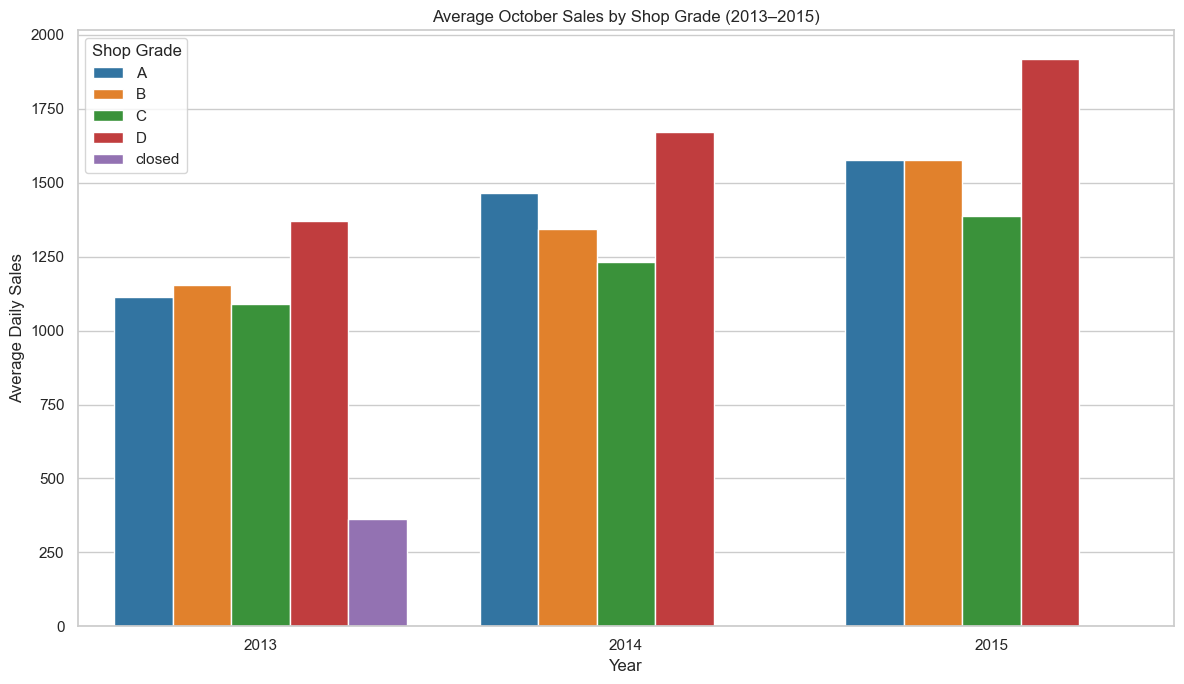

üìä 2015ÎÖÑ 10Ïõî ÌèâÍ∑† Îß§Ï∂úÏï° Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†

[Îì±Í∏â A]
- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): 1,576.48
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +41.4%
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +7.6%

[Îì±Í∏â B]
- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): 1,578.55
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +36.7%
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +17.3%

[Îì±Í∏â C]
- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): 1,388.23
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +27.2%
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +12.7%

[Îì±Í∏â D]
- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): 1,919.52
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +40.1%
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +14.9%

[Îì±Í∏â closed]
- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): nan
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%



In [32]:
# rub Îß§Ï∂ú Î∂ÑÏÑù 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month

# 3. 10Ïõî Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['month'] == 10]

# 4. Ïó∞ÎèÑÎ≥Ñ, Îì±Í∏âÎ≥Ñ ÌèâÍ∑† Îß§Ï∂úÏï° ÏßëÍ≥Ñ
october_grouped = (
    october
    .groupby(['year', 'shop_grade'])['rub_amount']
    .mean()
    .reset_index(name='avg_sales')
)

# 5. ÏãúÍ∞ÅÌôîÏö© Îì±Í∏â ÏàúÏÑú Î∞è ÌåîÎ†àÌä∏ Ï†ïÏùò
grade_order = ['A', 'B', 'C', 'D', 'closed']
palette = {'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'closed': '#9467bd'}

# 6. ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')

sns.barplot(
    data=october_grouped,
    x='year',
    y='avg_sales',
    hue='shop_grade',
    palette=palette,
    hue_order=grade_order
)

plt.title('Average October Sales by Shop Grade (2013‚Äì2015)')
plt.xlabel('Year')
plt.ylabel('Average Daily Sales')
plt.legend(title='Shop Grade')
plt.tight_layout()
plt.show()

# 3. ÌîºÎ≤ó ÌõÑ Ï¶ùÍ∞êÎ•† Í≥ÑÏÇ∞
oct_pivot = october_grouped.pivot(index='shop_grade', columns='year', values='avg_sales').reset_index()
oct_pivot['2015_vs_2013'] = ((oct_pivot[2015] - oct_pivot[2013]) / oct_pivot[2013] * 100).round(1)
oct_pivot['2015_vs_2014'] = ((oct_pivot[2015] - oct_pivot[2014]) / oct_pivot[2014] * 100).round(1)

# 4. Ï∂úÎ†•
print("üìä 2015ÎÖÑ 10Ïõî ÌèâÍ∑† Îß§Ï∂úÏï° Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†\n")
for i, row in oct_pivot.iterrows():
    grade = row['shop_grade']
    sales_2015 = row[2015]
    change_13 = row['2015_vs_2013']
    change_14 = row['2015_vs_2014']

    print(f"[Îì±Í∏â {grade}]")
    print(f"- ÌèâÍ∑† Îß§Ï∂úÏï° (2015ÎÖÑ 10Ïõî): {sales_2015:,.2f}")
    print(f"- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_13 >= 0 else ''}{change_13}%")
    print(f"- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_14 >= 0 else ''}{change_14}%")
    print()

In [33]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 10ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['year_month'] == '2015-10']

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
grade_category_monthly_sales = (
    october
    .groupby(['sub_category', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')  # Ìïú Îß§Ïû•Ïùò 10Ïõî Ï¥ù ÌåêÎß§Îüâ
)

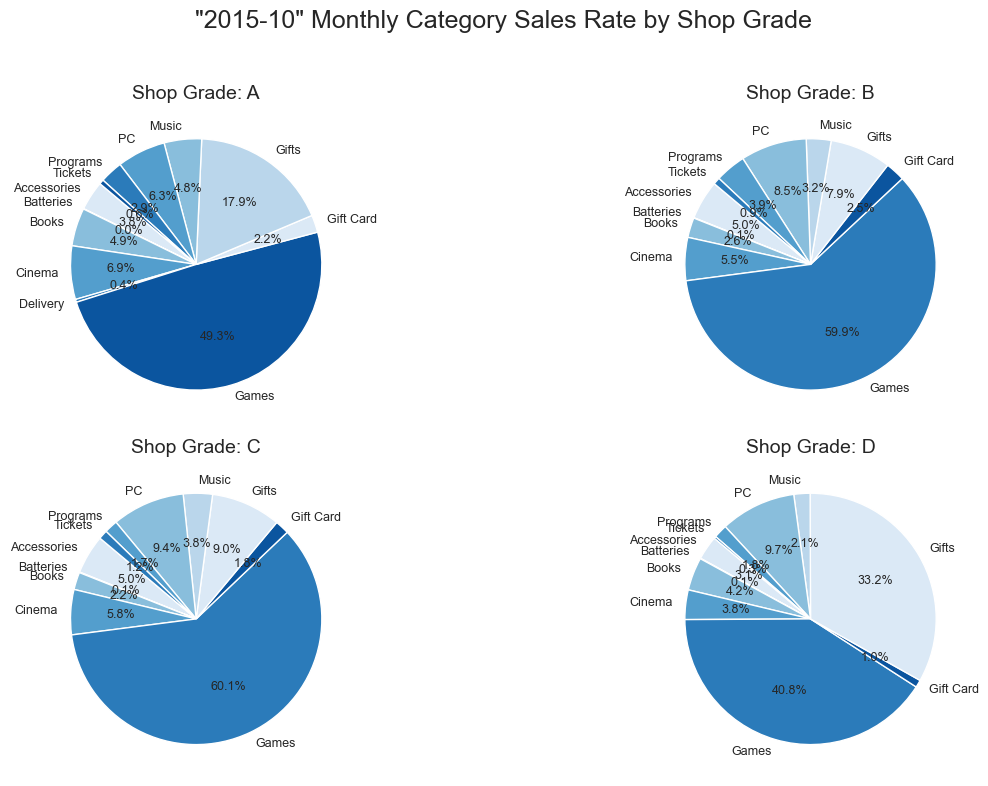

In [34]:
import math

grades = sorted(grade_category_monthly_sales['shop_grade'].unique())
n_grades = len(grades)

# Ìñâ, Ïó¥ Í∞úÏàò Í≥ÑÏÇ∞ (Ïòà: ÏµúÎåÄ 2Ïó¥, ÌñâÏùÄ ÌïÑÏöîÌïú ÎßåÌÅº)
n_cols = 2
n_rows = math.ceil(n_grades / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))
axes = axes.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

# colors = sns.color_palette('BuPu_r',len(grade_category_monthly_sales['sub_category'])) ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 
colors = sns.color_palette('Blues') 

for i, grade in enumerate(grades):
    data = grade_category_monthly_sales[grade_category_monthly_sales['shop_grade'] == grade]
    data = data[data['monthly_sales'] > 0]
    sales = data['monthly_sales']
    categories = data['sub_category']

    axes[i].pie(
        sales,
        labels=categories,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9},
        colors = colors  
    )
    axes[i].set_title(f'Shop Grade: {grade}', fontsize=14)

# ÎÇ®Îäî subplotÏùÄ ÏÇ≠Ï†ú
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('"2015-10" Monthly Category Sales Rate by Shop Grade', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 10ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['year_month'] == '2015-10']

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
grade_category_monthly_sales = (
    october
    .groupby(['sub_category', 'shop_grade'])['item_name_translated']
    .nunique()
    .reset_index(name='monthly_sales')
)

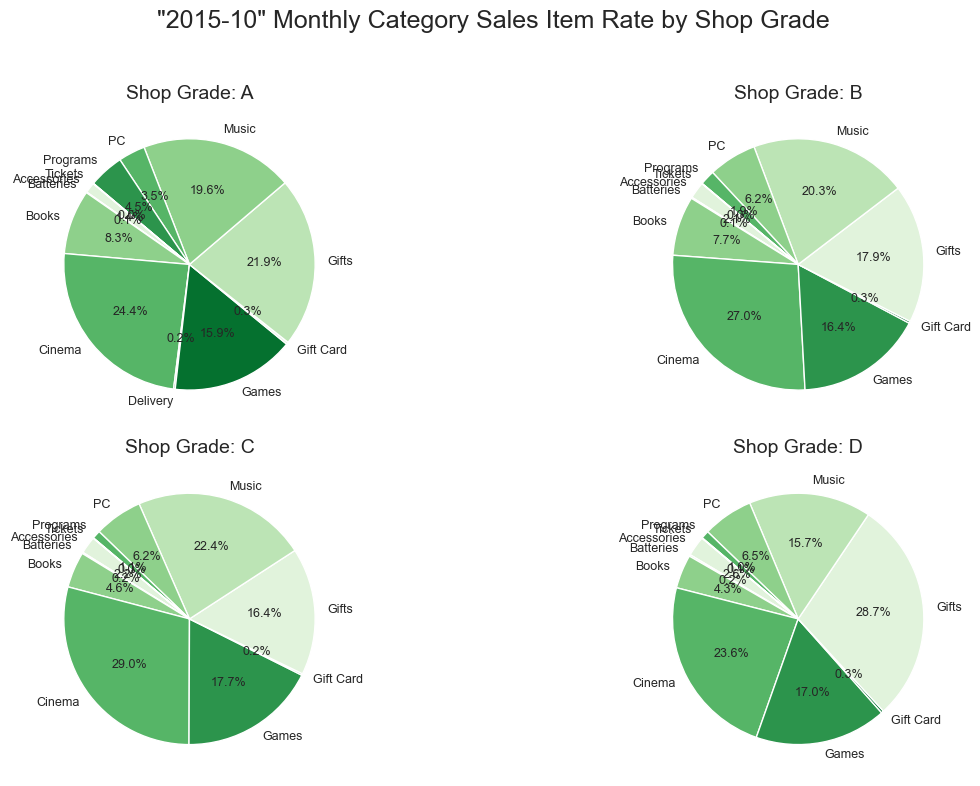

In [36]:
import math

grades = sorted(grade_category_monthly_sales['shop_grade'].unique())
n_grades = len(grades)

# Ìñâ, Ïó¥ Í∞úÏàò Í≥ÑÏÇ∞ (Ïòà: ÏµúÎåÄ 2Ïó¥, ÌñâÏùÄ ÌïÑÏöîÌïú ÎßåÌÅº)
n_cols = 2
n_rows = math.ceil(n_grades / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))
axes = axes.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

# colors = sns.color_palette('BuPu_r',len(grade_category_monthly_sales['sub_category'])) ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 
colors = sns.color_palette('Greens') ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 

for i, grade in enumerate(grades):
    data = grade_category_monthly_sales[grade_category_monthly_sales['shop_grade'] == grade]
    data = data[data['monthly_sales'] > 0]
    sales = data['monthly_sales']
    categories = data['sub_category']

    axes[i].pie(
        sales,
        labels=categories,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9},
        colors = colors  
    )
    axes[i].set_title(f'Shop Grade: {grade}', fontsize=14)

# ÎÇ®Îäî subplotÏùÄ ÏÇ≠Ï†ú
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('"2015-10" Monthly Category Sales Item Rate by Shop Grade', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


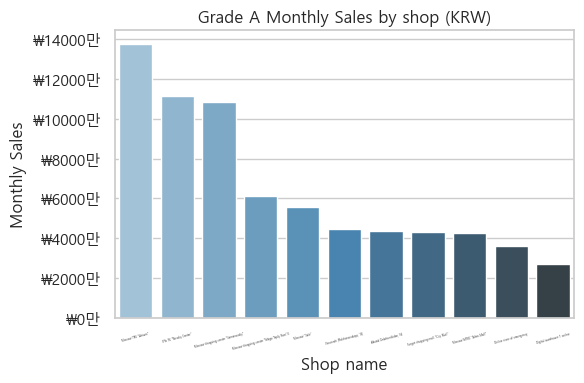

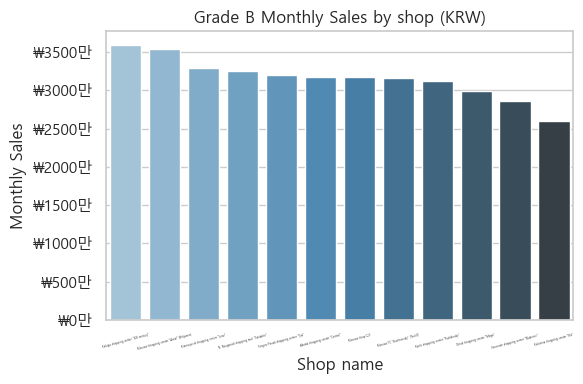

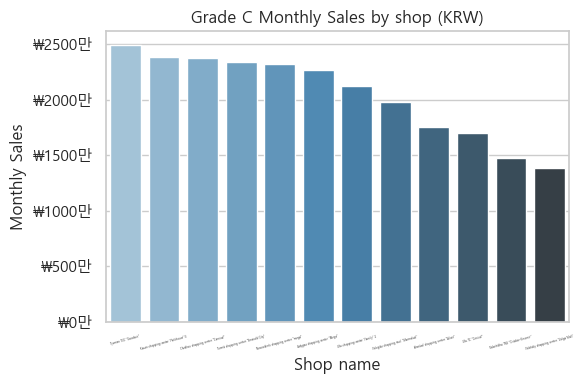

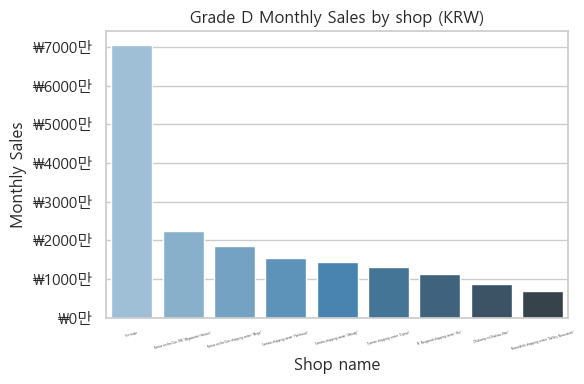

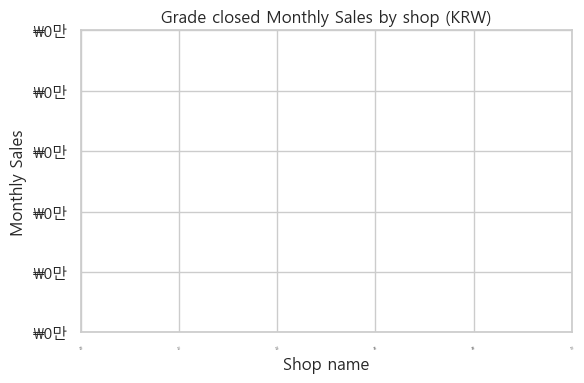

In [37]:
# Ï≤úÎßåÏõê Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_1k(x, pos):
    return f'‚Ç©{x * 1e-4:.0f}Îßå'  # M for ÎßåÏõê Îã®ÏúÑÎ°ú Í∞ÑÏ£º

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 10ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['year_month'] == '2015-10']

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
grade_monthly_sales = (
    october
    .groupby(['shop_name', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')
)

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')
# sns.set_style('whitegrid')

grades = np.sort(df_train['shop_grade'].unique())  # Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨ (A, B, C, D...)

for g in grades:
    # Ìï¥Îãπ gradeÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    data = grade_monthly_sales[grade_monthly_sales['shop_grade'] == g]

    # Îß§Ïû•Î≥Ñ Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
    store_sales = data.groupby('shop_name')['monthly_sales'].sum().reset_index(name='monthly_sales')

    # ÌåêÎß§Îüâ Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
    store_sales = store_sales.sort_values(by='monthly_sales', ascending=False)

    plt.figure(figsize=(6,4))
    sns.barplot(data=store_sales, x='shop_name', y='monthly_sales', palette='Blues_d')
    plt.title(f'Grade {g} Monthly Sales by shop (KRW)')    
    plt.xlabel('Shop name')
    plt.ylabel('Monthly Sales')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_1k))
    plt.xticks(rotation=15, fontsize=2)
    
    plt.tight_layout()
    plt.show()


In [38]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 10ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
october = df_train[df_train['year_month'] == '2015-10']
september = df_train[df_train['year_month'] == '2015-09']
last_october = october = df_train[df_train['year_month'] == '2014-10']

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
this_grade_monthly_sales = (
    october
    .groupby(['shop_name', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')
)

last_grade_monthly_sales = (
    september
    .groupby(['shop_name', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')
)

year_grade_monthly_sales = (
    last_october
    .groupby(['shop_name', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')
)


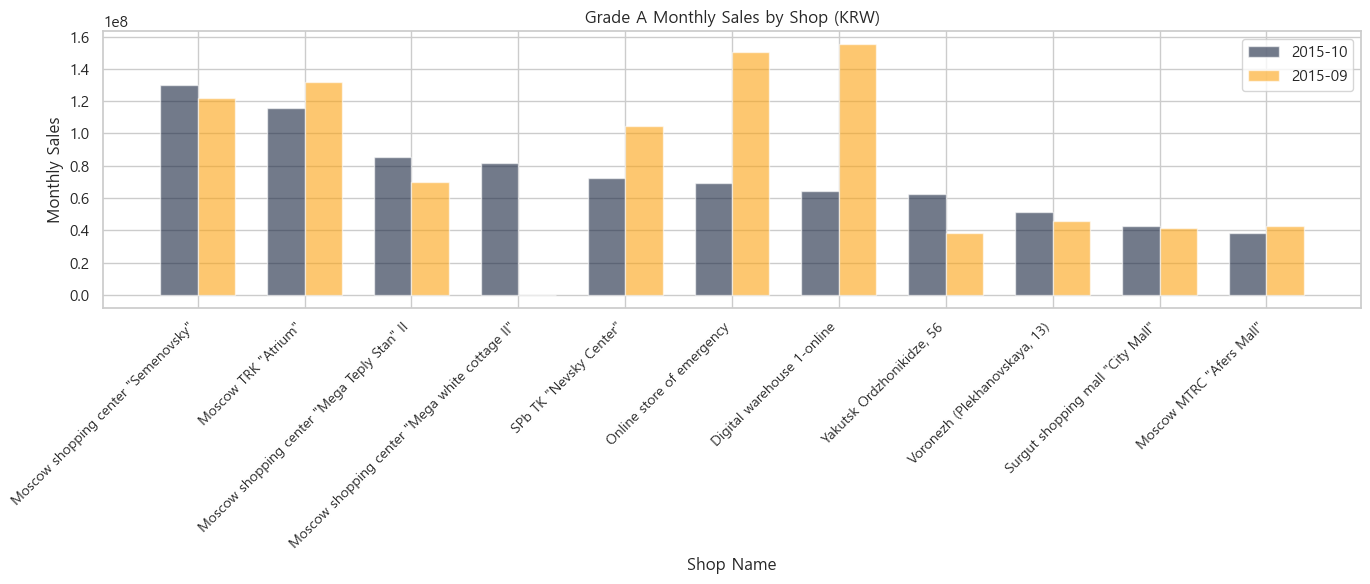

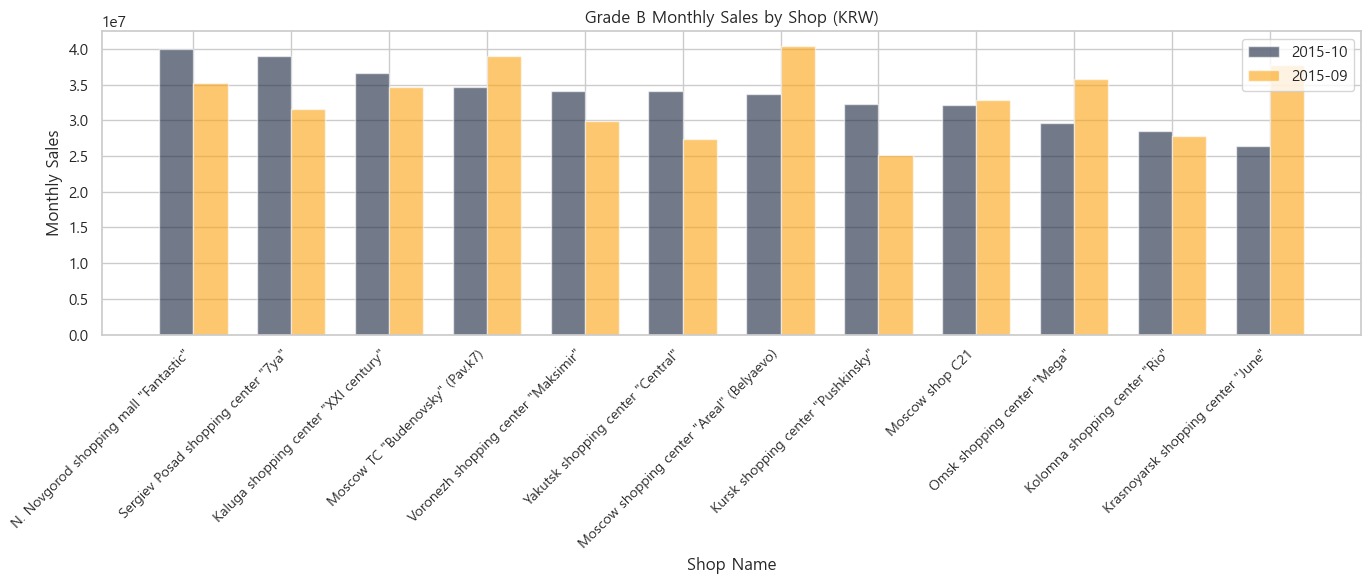

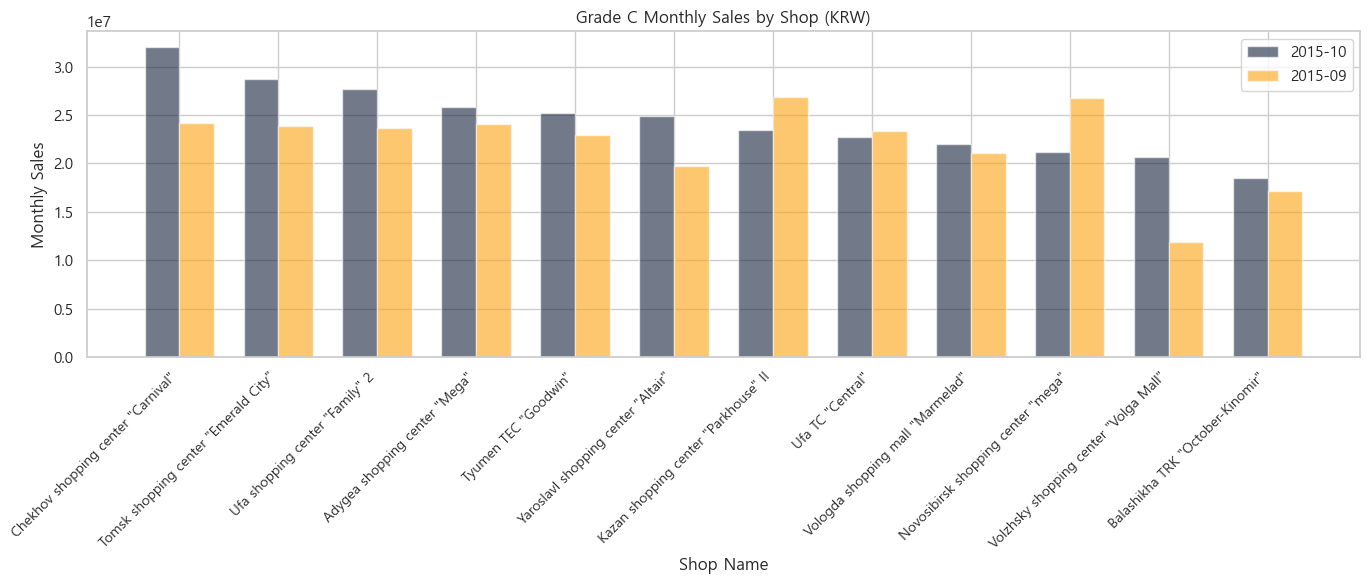

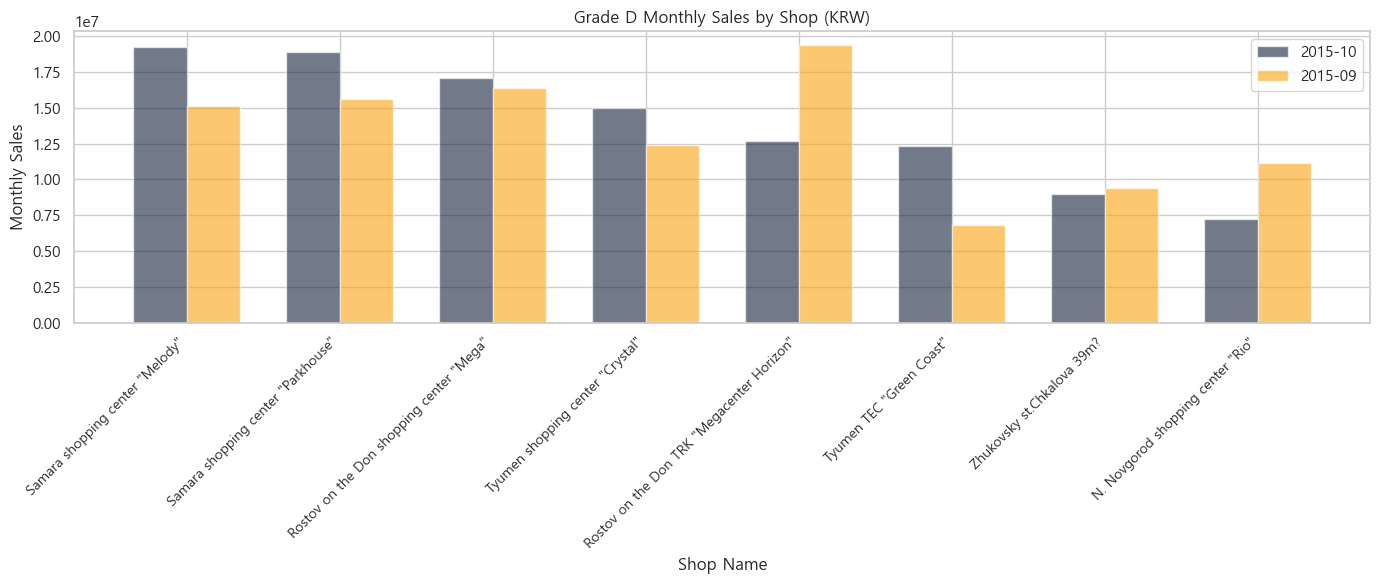

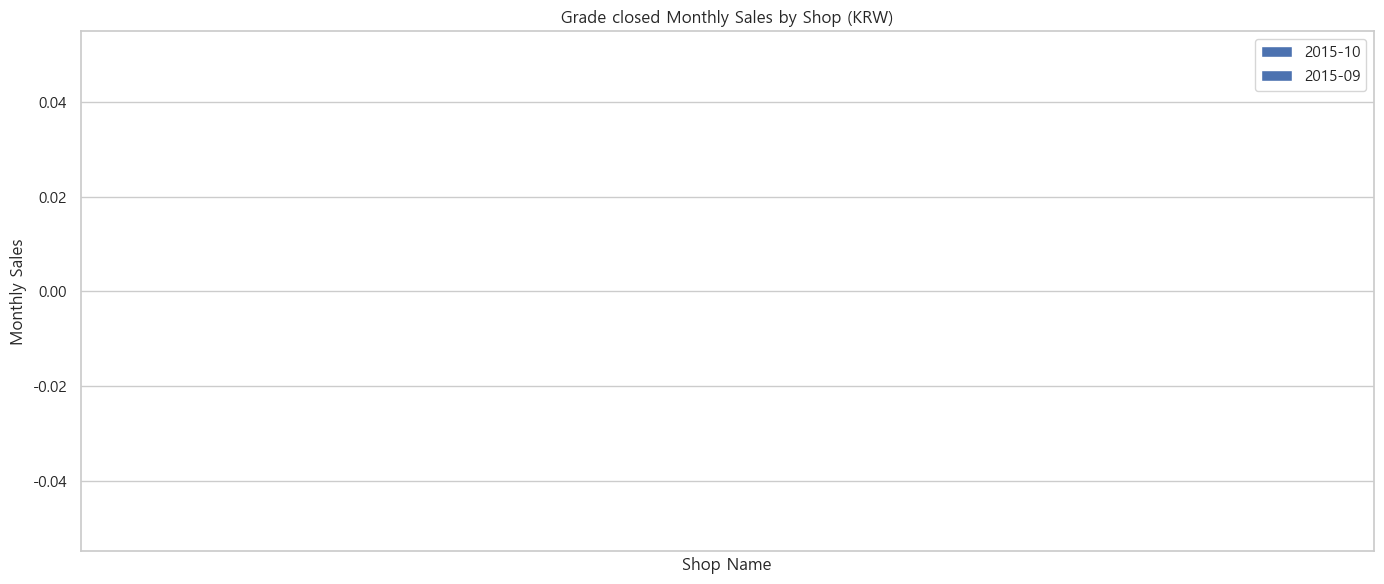

In [39]:
for g in grades:
    # Ìï¥Îãπ gradeÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    this_data = this_grade_monthly_sales[this_grade_monthly_sales['shop_grade'] == g]
    last_data = last_grade_monthly_sales[last_grade_monthly_sales['shop_grade'] == g]

    # Îß§Ïû•Î≥Ñ Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
    this_store_sales = this_data.groupby('shop_name')['monthly_sales'].sum().reset_index()
    last_store_sales = last_data.groupby('shop_name')['monthly_sales'].sum().reset_index()

    # ÌåêÎß§Îüâ Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
    this_store_sales = this_store_sales.sort_values(by='monthly_sales', ascending=False)
    last_store_sales = last_store_sales.sort_values(by='monthly_sales', ascending=False)

    # Í≥µÌÜµ Îß§Ïû• Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (Îëò Îã§ Ï°¥Ïû¨ÌïòÎäî Îß§Ïû•Îßå ÏÇ¨Ïö©)
    merged = pd.merge(this_store_sales, last_store_sales, on='shop_name', suffixes=('_this', '_last'))
    merged = merged.head(14)  # top 14Îßå ÏãúÍ∞ÅÌôî

    fig, ax = plt.subplots(figsize=(14, 6))
    bar_width = 0.35
    index = np.arange(len(merged))

    plt.bar(index, merged['monthly_sales_this'], bar_width,
            alpha=0.6, color='#14213d', label='2015-10')
    plt.bar(index + bar_width, merged['monthly_sales_last'], bar_width,
            alpha=0.6, color='#fca311', label='2015-09')

    plt.xticks(index + bar_width / 2, merged['shop_name'], rotation=45, ha='right', fontsize=10)
    plt.title(f'Grade {g} Monthly Sales by Shop (KRW)')
    plt.xlabel('Shop Name')
    plt.ylabel('Monthly Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()


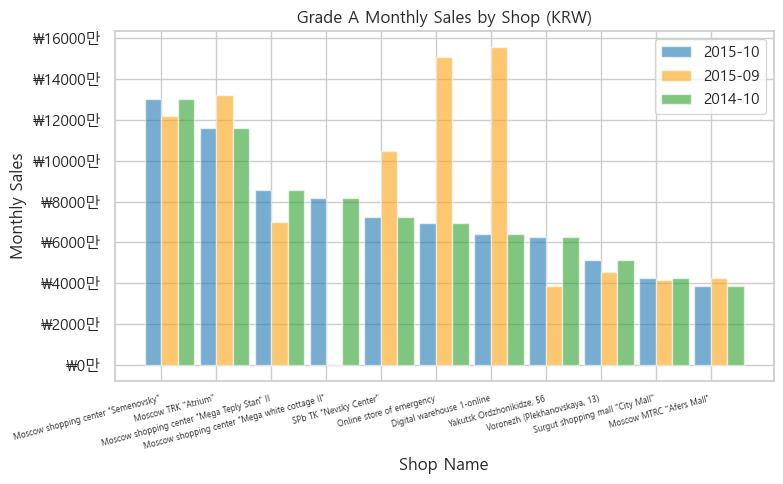

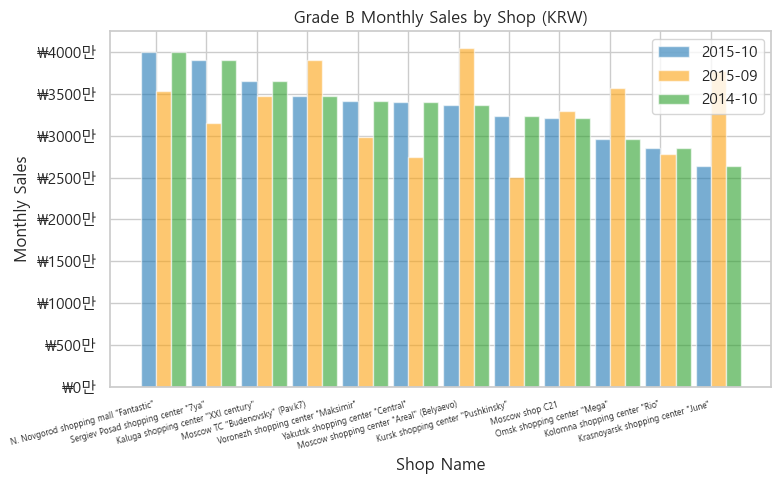

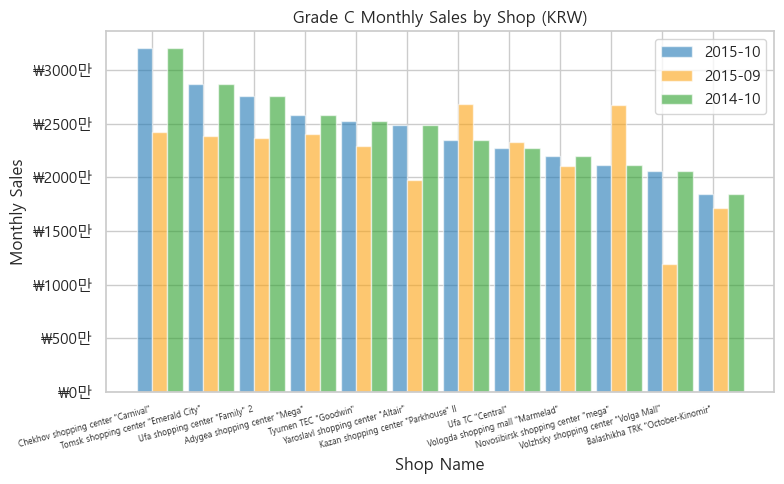

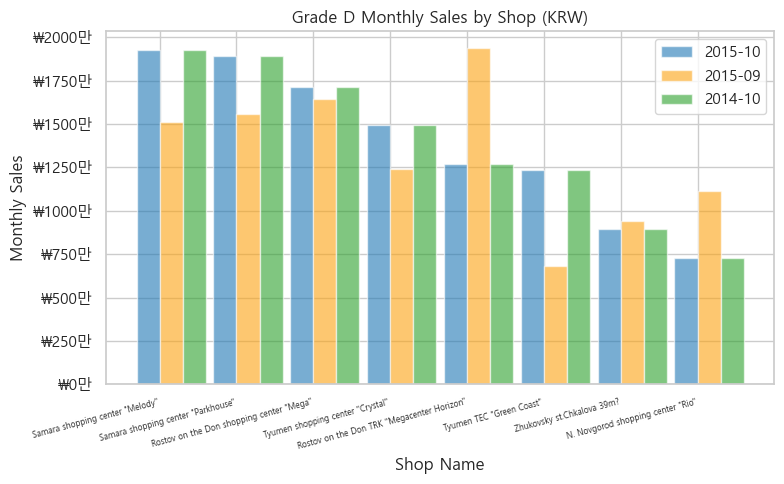

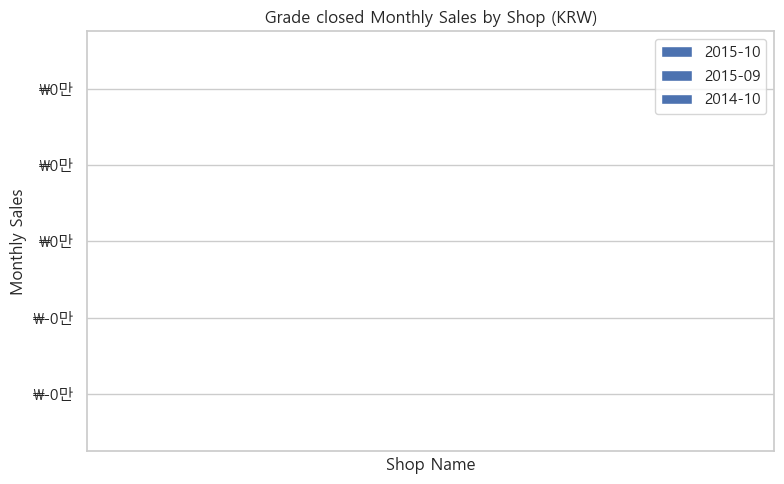

In [40]:
# Ï≤úÎßåÏõê Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_1k(x, pos):
    return f'‚Ç©{x * 1e-4:.0f}Îßå'  # M for ÎßåÏõê Îã®ÏúÑÎ°ú Í∞ÑÏ£º

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

for g in grades:
    # Ìï¥Îãπ gradeÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    this_data = this_grade_monthly_sales[this_grade_monthly_sales['shop_grade'] == g]
    last_data = last_grade_monthly_sales[last_grade_monthly_sales['shop_grade'] == g]
    year_data = year_grade_monthly_sales[year_grade_monthly_sales['shop_grade'] == g]

    # Îß§Ïû•Î≥Ñ Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
    this_store_sales = this_data.groupby('shop_name')['monthly_sales'].sum().reset_index()
    last_store_sales = last_data.groupby('shop_name')['monthly_sales'].sum().reset_index()
    year_store_sales = year_data.groupby('shop_name')['monthly_sales'].sum().reset_index()

    # ÌåêÎß§Îüâ Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
    this_store_sales = this_store_sales.sort_values(by='monthly_sales', ascending=False)
    last_store_sales = last_store_sales.sort_values(by='monthly_sales', ascending=False)
    year_store_sales = year_store_sales.sort_values(by='monthly_sales', ascending=False)

    # Í≥µÌÜµ Îß§Ïû• Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (Îëò Îã§ Ï°¥Ïû¨ÌïòÎäî Îß§Ïû•Îßå ÏÇ¨Ïö©)
    year_store_sales = year_store_sales.rename(columns={'monthly_sales': 'monthly_sales_year'})
    merged = pd.merge(this_store_sales, last_store_sales, on='shop_name', suffixes=('_this', '_last'))
    merged = pd.merge(merged, year_store_sales, on='shop_name')
    merged = merged.head(14)  # top 14Îßå ÏãúÍ∞ÅÌôî

    fig, ax = plt.subplots(figsize=(8, 5))
    bar_width = 0.3
    index = np.arange(len(merged))

    plt.bar(index, merged['monthly_sales_this'], bar_width, alpha=0.6, color='#1f77b4', label='2015-10')
    plt.bar(index + bar_width, merged['monthly_sales_last'], bar_width, alpha=0.6, color='#fca311', label='2015-09')
    plt.bar(index + 2 * bar_width, merged['monthly_sales_year'], bar_width, alpha=0.6, color='#2ca02c', label='2014-10')

    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_1k))
    plt.xticks(index + bar_width/2, merged['shop_name'], rotation=15, ha='right', fontsize=6)
    plt.title(f'Grade {g} Monthly Sales by Shop (KRW)')
    plt.xlabel('Shop Name')
    plt.ylabel('Monthly Sales')
    plt.legend(loc=0)
    plt.tight_layout()
    plt.show()


### 2015ÎÖÑ 11Ïõî ÏòàÏ∏° ÏãúÍ∞ÅÌôî

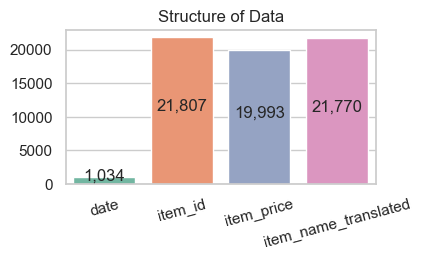

In [41]:
data = {'date': len(df_train.date.unique()),
        'item_id': len(df_train.item_id.unique()),
        'item_price': len(df_train.item_price.unique()),
        'item_name_translated': len(df_train.item_name_translated.unique())}
data_structure = pd.DataFrame(data, index=[0])

sns.set_style('whitegrid')
fig, ax = plt.subplots( figsize=(4,2) )
ax = sns.barplot(data = data_structure, palette = 'Set2')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # Í∞ÄÎ°ú ÏúÑÏπò
            p.get_y() + p.get_height()/2,   # ÏÑ∏Î°ú ÏúÑÏπò
            f"{p.get_height():,.0f}",   # Í∞í + ÌëúÏãúÎ∞©Î≤ï ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ 
            ha = 'center' )   # Ï¢åÏö∞Ï†ïÎ†¨ Ï§ëÍ∞ÑÏúºÎ°ú
plt.title('Structure of Data')
plt.xticks(rotation=15)
plt.show()

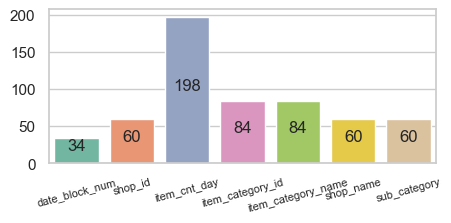

In [42]:
data = {'date_block_num': len(df_train.date_block_num.unique()),
        'shop_id': len(df_train.shop_id.unique()),
        'item_cnt_day': len(df_train.item_cnt_day.unique()),
        'item_category_id': len(df_train.item_category_id.unique()),
        'item_category_name': len(df_train.item_category_name.unique()),
        'shop_name': len(df_train.shop_name.unique()),
        'sub_category': len(df_train.shop_id.unique())}
data_structure = pd.DataFrame(data, index=[0])
sns.set_style('whitegrid')
fig, ax = plt.subplots( figsize=(5,2) )
ax = sns.barplot(data = data_structure, palette = 'Set2')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # Í∞ÄÎ°ú ÏúÑÏπò
            p.get_y() + p.get_height()/2,   # ÏÑ∏Î°ú ÏúÑÏπò
            f"{p.get_height():,.0f}",   # Í∞í + ÌëúÏãúÎ∞©Î≤ï ÏÜåÏàò ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ 
            ha = 'center' )   # Ï¢åÏö∞Ï†ïÎ†¨ Ï§ëÍ∞ÑÏúºÎ°ú
plt.xticks(rotation=15, fontsize=8)
plt.show()

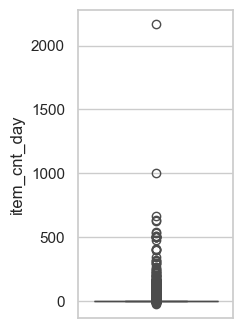

In [43]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots( figsize=(2,4) )
sns.boxplot(y='item_cnt_day', data=df_train)
plt.show()

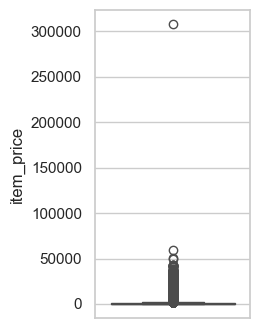

In [44]:
fig, ax = plt.subplots( figsize=(2,4) )
sns.boxplot(y='item_price', data=df_train);
plt.show()

In [45]:
pd.set_option('display.max_columns', None)
df_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

                         item_name_translated  item_category_id  \
0                             SCENE 2012 (BD)                37   
1    DEEP PURPLE  The House Of Blue Light  LP                58   
2    DEEP PURPLE  The House Of Blue Light  LP                58   
3    DEEP PURPLE  Who Do You Think We Are  LP                58   
4  DEEP PURPLE 30 Very Best Of 2CD (√ê¬§√ê¬∏?√ê¬º.)                56   

                   item_category_name                           shop_name  \
0                   Cinema - Blu -Ray  Yaroslavl shopping center "Altair"   
1                       Music - vinyl                 Moscow TRK "Atrium"   
2                       Music - vinyl                 Moscow TRK "Atrium"   
3                       Music - vinyl                 Moscow TRK "Atrium"   
4  Music - CD of corporate production                 Moscow TRK "Atrium"   

  shop_grade  holiday  weekend       city sub_category  rub_amount  \
0          C        1        0  Yaroslavl       Cinema      999.00   
1          A        1        0     Moscow        Music      899.00   
2          A        0        1     Moscow        Music     -899.00   
3          A        0        1     Moscow        Music     1709.05   
4          A        0        0     Moscow        Music     1099.00   

   krw_amount  year  month  day year_month  
0     17982.0  2013      1    2    2013-01  
1     16182.0  2013      1    3    2013-01  
2    -16182.0  2013      1    5    2013-01  
3     30762.9  2013      1    6    2013-01  
4     19782.0  2013      1   15    2013-01

In [46]:
df_pred = pd.read_excel('./predict_sales_filled_3.xlsx', engine='openpyxl')

In [47]:
# item_idÎ≥ÑÎ°ú ÎßàÏßÄÎßâ ÌåêÎß§ ÏùºÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• ÎßàÏßÄÎßâ Í∞ÄÍ≤© Ï∂îÏ∂ú
last_prices = (
    df_train.sort_values(['item_id', 'date'])  # Î®ºÏ†Ä ÎÇ†ÏßúÏàúÏúºÎ°ú Ï†ïÎ†¨
      .groupby('item_id')                # item_id Í∏∞Ï§Ä Í∑∏Î£πÌôî
      .last()                            # Í∞Å Í∑∏Î£πÏóêÏÑú ÎßàÏßÄÎßâ Ìñâ Ï∂îÏ∂ú
      .reset_index()[['item_id', 'item_price']]  # ÌïÑÏöîÌïú Ïª¨ÎüºÎßå
)

# item_id Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
item_price_list = df_train['item_id'].unique()

# item_idÏôÄ ÎßàÏßÄÎßâ Í∞ÄÍ≤©ÏùÑ Î¨∂ÏùÄ DataFrame ÏÉùÏÑ±
item_price_df = pd.DataFrame({'item_id': item_price_list})

# ÎßàÏßÄÎßâ Í∞ÄÍ≤© Ï†ïÎ≥¥ Í≤∞Ìï©
item_price_df = item_price_df.merge(last_prices, on='item_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
print(item_price_df.head())

   item_id  item_price
0    22154      299.00
1     2552      949.00
2     2554     1709.05
3     2555     1149.00
4     2564      249.00


In [48]:
df_train_2 = df_train.copy()

In [49]:
df_train_2 = pd.concat([df_train_2, df_pred])

In [50]:
# category, shop Ï§ëÎ∂ÑÎ•ò Ï∂îÍ∞Ä
df_train_2['city'] = df_train_2['shop_name'].str.split(' ').str[0]
df_train_2['sub_category'] = df_train_2['item_category_name'].str.split(' ').str[0]
# Ï§ëÎ∂ÑÎ•òÎ™Ö Ï†ïÎ¶¨ ‚Üí 13Í∞ú
df_train_2['sub_category'] = df_train_2['sub_category'].replace({'Pure' : 'Carrier', 'Clean' : 'Carrier', 'Elements': 'Batteries', 'Payment' : 'Gift Card', 'Service' : 'Tickets', 'Android' : 'Games', 'Mac' : 'Games', 'Game' : 'Games'})
# cityÎ™Ö Ï†ïÎ¶¨
df_train_2['city'] = df_train_2['city'].replace({'!' : 'Yakutsk', 'Exit' : 'Other', 'N.' : 'NizhnyNovgorod', 'SPb' : 'SanktPetersburg', 'Digital' : 'Online'})

In [51]:
df_train_2.tail()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
238167 2015-11-01              34       59    22162      349.00      0.115440   
238168 2015-11-01              34       59    22163       90.23      0.123268   
238169 2015-11-01              34       59    22164      549.00      0.150644   
238170 2015-11-01              34       59    22166      150.00     -0.023599   
238171 2015-11-01              34       59    22167      299.00      0.071352   

       item_name_translated  item_category_id  \
238167                  NaN                40   
238168                  NaN                40   
238169                  NaN                37   
238170                  NaN                54   
238171                  NaN                49   

                         item_category_name  \
238167                         Cinema - DVD   
238168                         Cinema - DVD   
238169                    Cinema - Blu -Ray   
238170                   Books are a figure   
238171  Books - Methodological materials 1C   

                                 shop_name shop_grade  holiday  weekend  \
238167  Yaroslavl shopping center "Altair"        NaN      NaN      NaN   
238168  Yaroslavl shopping center "Altair"        NaN      NaN      NaN   
238169  Yaroslavl shopping center "Altair"        NaN      NaN      NaN   
238170  Yaroslavl shopping center "Altair"        NaN      NaN      NaN   
238171  Yaroslavl shopping center "Altair"        NaN      NaN      NaN   

             city sub_category  rub_amount   krw_amount  year  month  day  \
238167  Yaroslavl       Cinema   40.288463   725.192333  2015     11    1   
238168  Yaroslavl       Cinema   11.122490   200.204828  2015     11    1   
238169  Yaroslavl       Cinema   82.703659  1488.665856  2015     11    1   
238170  Yaroslavl        Books   -3.539905   -63.718282  2015     11    1   
238171  Yaroslavl        Books   21.334184   384.015315  2015     11    1   

                 year_month  
238167  2015-11-01 00:00:00  
238168  2015-11-01 00:00:00  
238169  2015-11-01 00:00:00  
238170  2015-11-01 00:00:00  
238171  2015-11-01 00:00:00

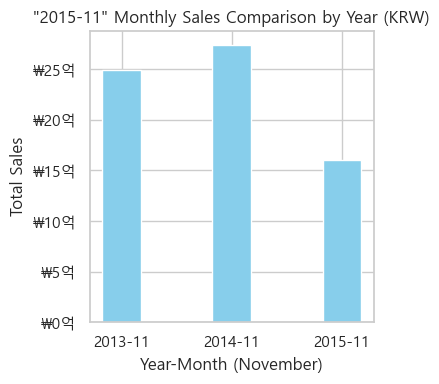

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ÎπÑÍµêÌï† Ïó∞ÎèÑ 11Ïõî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
compare_years = ['2013-11', '2014-11', '2015-11']
df_train_2['year_month'] = df_train_2['date'].dt.to_period('M')
annual_sales = df_train_2[df_train_2['year_month'].astype(str).isin(compare_years)]

# Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í≥ÑÏÇ∞
annual_summary = annual_sales.groupby('year_month')['krw_amount'].sum().sort_index()
annual_summary_reset = pd.DataFrame(annual_summary).reset_index()
index = range(len(annual_summary_reset))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
# sns.set_style('whitegrid')
plt.figure(figsize=(4,4))

# Îç∞Ïù¥ÌÑ∞ Ïû¨Ï†ïÎ†¨ Î∞è Ïù∏Îç±Ïä§ ÏÉùÏÑ±
bar_width = 0.35
index = range(len(annual_summary_reset))
# Ïñµ Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_100m(x, pos):
    return f'‚Ç©{x * 1e-8:.0f}Ïñµ'  # B for "Billion KRW" (Ïñµ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)

# ÌïúÌôî Îß§Ï∂ú ÎßâÎåÄ
plt.bar(index, annual_summary_reset['krw_amount'], bar_width, label='KRW Amount', color='skyblue')

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï (2013-11, 2014-11, 2015-11)
plt.xticks(index, annual_summary_reset['year_month'])
plt.xlabel('Year-Month (November)')
plt.ylabel('Total Sales')
plt.title('"2015-11" Monthly Sales Comparison by Year (KRW)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
# plt.legend()

plt.tight_layout()
plt.show()

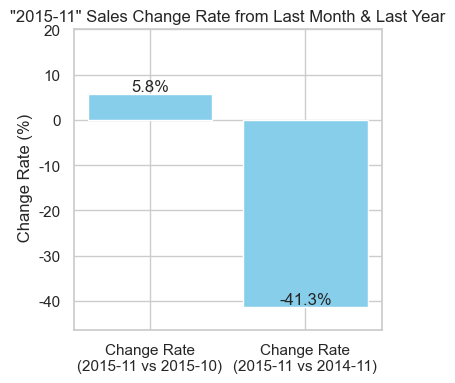

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Í∞Å ÎπÑÍµêÎ≥Ñ % Î≥ÄÌôîÏú® Í≥ÑÏÇ∞ (Î£®Î∏î, ÌïúÌôî Ìï©Í≥Ñ Í∏∞Ï§Ä)
# rub_amountÏôÄ krw_amount Ìï©Ïπú Ï¥ù Îß§Ï∂ú Í∏∞Ï§ÄÏúºÎ°ú Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî krw_amount Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏãú ÏûëÏÑ±

compare_months = ['2015-11', '2015-10', '2014-11']
monthly_sales = df_train_2[df_train_2['year_month'].astype(str).isin(compare_months)]
monthly_summary = monthly_sales.groupby('year_month')[['rub_amount', 'krw_amount']].sum().sort_index()
month_rate = (monthly_summary.loc['2015-11', 'krw_amount'] / monthly_summary.loc['2015-10', 'krw_amount'] - 1) * 100
year_month_rate = (monthly_summary.loc['2015-11', 'krw_amount'] / monthly_summary.loc['2014-11', 'krw_amount'] - 1) * 100

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
rates = pd.Series([ month_rate, year_month_rate],
                  index=['Change Rate\n(2015-11 vs 2015-10)', 'Change Rate\n(2015-11 vs 2014-11)'])

plt.figure(figsize=(4,4))
bars = plt.bar(rates.index, rates.values, color='skyblue')

plt.ylabel(' Change Rate (%)')
plt.title('"2015-11" Sales Change Rate from Last Month & Last Year') # RubÏù¥ÎÇò KRWÏù¥ÎÇò ÎπÑÏú®ÏùÄ Í∞ôÏùå
plt.ylim(min(rates.values.min() - 5, -20), max(rates.values.max() + 5, 20))

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

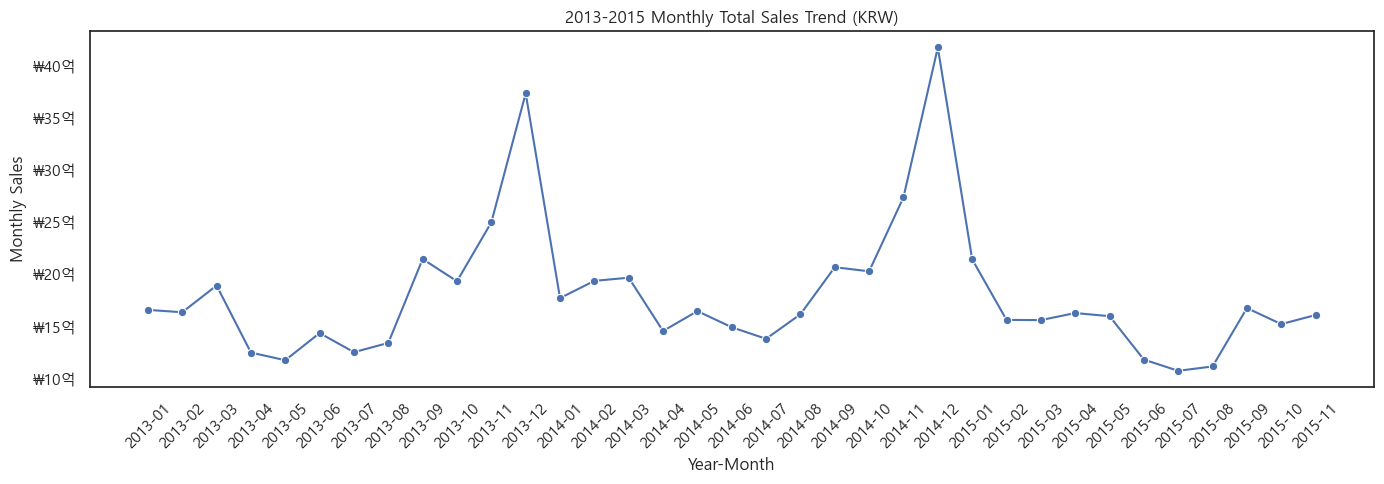

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# ÏõîÎ≥Ñ  ÌèâÍ∑† Îß§Ï∂ú Í≥ÑÏÇ∞
monthly_sales = df_train_2.groupby('year_month')['krw_amount'].sum()
monthly_sales = pd.DataFrame(monthly_sales).reset_index()

plt.figure(figsize=(14, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_100m))
sns.set_style('whitegrid')
sns.lineplot(data=monthly_sales, x= monthly_sales['year_month'].astype(str), y='krw_amount', palette='Blues_d', marker = 'o')

plt.title('2013-2015 Monthly Total Sales Trend (KRW)')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

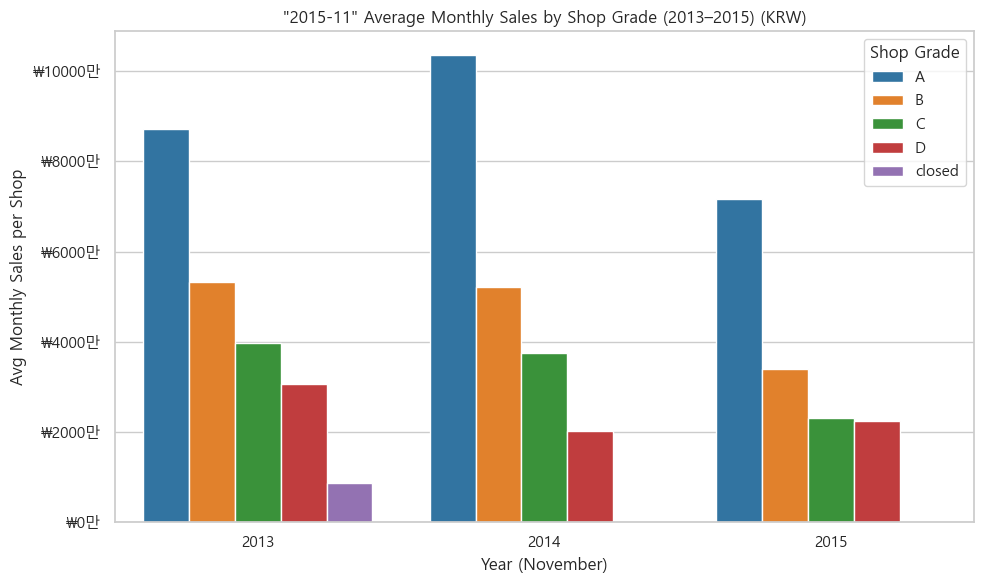

üìä 2015ÎÖÑ 11Ïõî ÌèâÍ∑† *ÏõîÍ∞Ñ ÌåêÎß§Îüâ* Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†

[Îì±Í∏â A]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): 71,579,130
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -30.9%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -18.0%

[Îì±Í∏â B]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): 33,980,463
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -34.8%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -36.2%

[Îì±Í∏â C]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): 23,086,598
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -38.6%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -41.9%

[Îì±Í∏â D]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): 22,551,553
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: +11.2%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: -26.4%

[Îì±Í∏â closed]
- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): nan
- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%
- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: nan%



In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # # 1. ÎÇ†Ïßú Ï≤òÎ¶¨
# # df_train_2['date'] = pd.to_datetime(df_train['date'])
# df_train_2['year'] = df_train_2['date'].dt.year
# df_train_2['month'] = df_train_2['date'].dt.month


plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')


# 2. 11ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
november = df_train_2[df_train_2['month'] == 11]

# 3. Îß§Ïû•Î≥Ñ 11Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
monthly_sales = (
    november
    .groupby(['year', 'shop_id', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')  # Ìïú Îß§Ïû•Ïùò 11Ïõî Ï¥ù ÌåêÎß§Îüâ
)

# 4. Ïó∞ÎèÑÎ≥Ñ, Îì±Í∏âÎ≥Ñ ÌèâÍ∑† Îß§Ïû•Îãπ ÏõîÍ∞Ñ ÌåêÎß§Îüâ
november_grouped = (
    monthly_sales
    .groupby(['year', 'shop_grade'])['monthly_sales']
    .mean()
    .reset_index(name='avg_sales')
)

# 5. ÌîºÎ≤óÌïòÏó¨ Ï¶ùÍ∞êÎ•† Í≥ÑÏÇ∞
nov_pivot = november_grouped.pivot(index='shop_grade', columns='year', values='avg_sales').reset_index()
nov_pivot['2015_vs_2013'] = ((nov_pivot[2015] - nov_pivot[2013]) / nov_pivot[2013] * 100).round(1)
nov_pivot['2015_vs_2014'] = ((nov_pivot[2015] - nov_pivot[2014]) / nov_pivot[2014] * 100).round(1)

# 6. ÏãúÍ∞ÅÌôîÏö© long-form Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
plot_df = pd.melt(
    nov_pivot,
    id_vars='shop_grade',
    value_vars=[2013, 2014, 2015],
    var_name='year',
    value_name='avg_sales'
)

# 7. Îì±Í∏â ÏàúÏÑúÏôÄ ÏÉâÏÉÅ Ï†ïÏùò
grade_order = ['A', 'B', 'C', 'D', 'closed']
palette = {'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'closed': '#9467bd'}

# 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
# sns.set_style('whitegrid')
sns.barplot(
    data=plot_df,
    x='year',
    y='avg_sales',
    hue='shop_grade',
    palette=palette,
    hue_order=grade_order
)

# Ï≤úÎßåÏõê Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_1k(x, pos):
    return f'‚Ç©{x * 1e-4:.0f}Îßå'  # M for ÎßåÏõê Îã®ÏúÑÎ°ú Í∞ÑÏ£º

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

plt.title('"2015-11" Average Monthly Sales by Shop Grade (2013‚Äì2015) (KRW)')
plt.ylabel('Avg Monthly Sales per Shop')
plt.xlabel('Year (November)')
plt.legend(title='Shop Grade')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_1k))
plt.tight_layout()
plt.show()

# 9. ÏΩòÏÜî Ï∂úÎ†•
print("üìä 2015ÎÖÑ 11Ïõî ÌèâÍ∑† *ÏõîÍ∞Ñ ÌåêÎß§Îüâ* Î∞è Ï†ÑÎÖÑ ÎèôÏõî ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†\n")
for i, row in nov_pivot.iterrows():
    grade = row['shop_grade']
    sales_2015 = row[2015]
    change_13 = row['2015_vs_2013']
    change_14 = row['2015_vs_2014']

    print(f"[Îì±Í∏â {grade}]")
    print(f"- ÌèâÍ∑† ÏõîÍ∞Ñ ÌåêÎß§Îüâ (2015ÎÖÑ 11Ïõî): {sales_2015:,.0f}")
    print(f"- 2014ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_14 >= 0 else ''}{change_14}%")
    print(f"- 2013ÎÖÑ ÎåÄÎπÑ Ï¶ùÍ∞êÎ•†: {'+' if change_13 >= 0 else ''}{change_13}%")
    print()


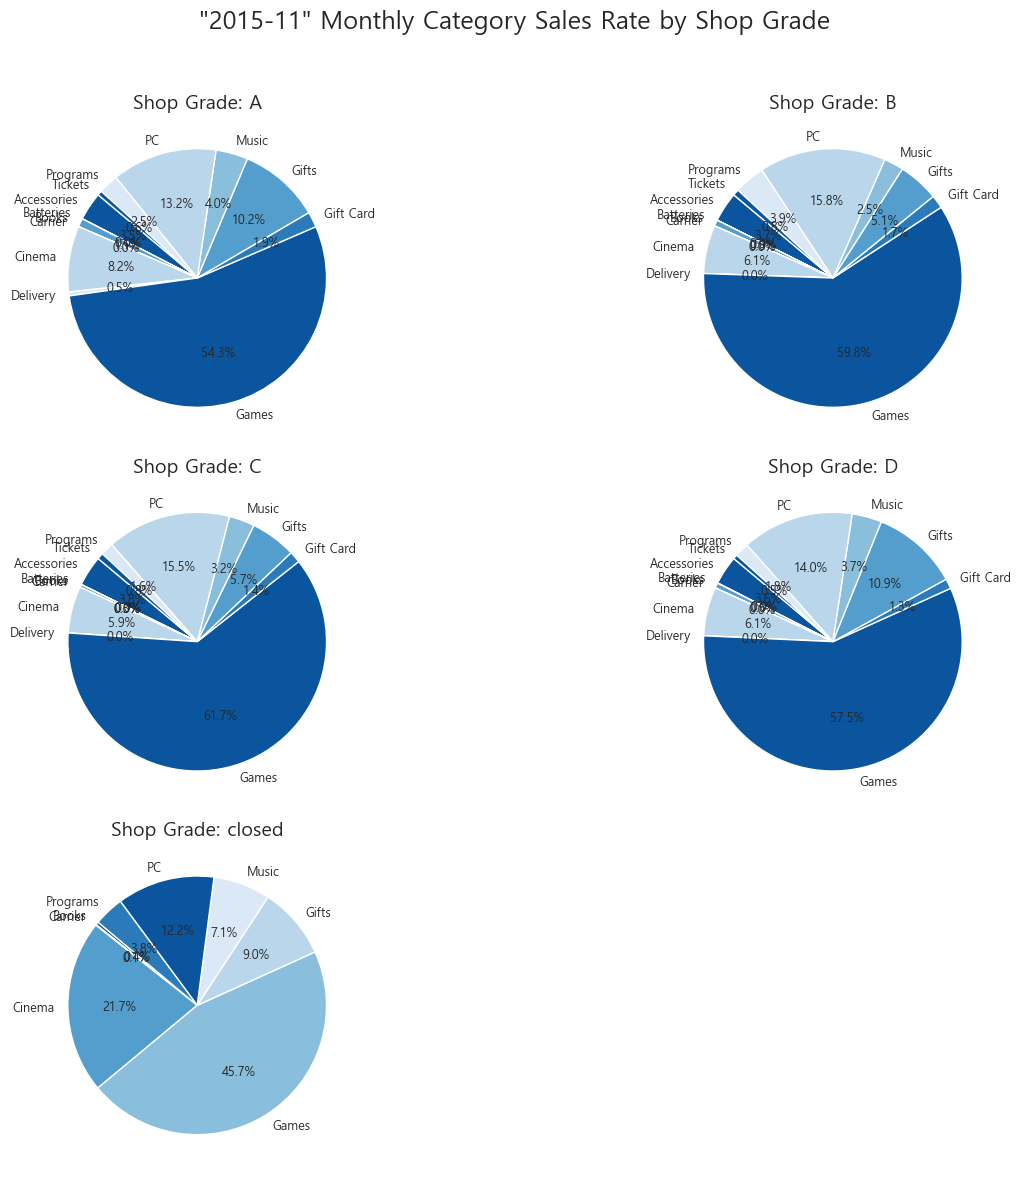

In [56]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
# df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 11ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
# november = df_train[df_train['year_month'] == '2015-11']

# 3. Îß§Ïû•Î≥Ñ 10Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
grade_category_monthly_sales = (
    november
    .groupby(['sub_category', 'shop_grade'])['krw_amount']
    .sum()
    .reset_index(name='monthly_sales')  # Ìïú Îß§Ïû•Ïùò 11Ïõî Ï¥ù ÌåêÎß§Îüâ
)

import math

grades = sorted(grade_category_monthly_sales['shop_grade'].unique())
n_grades = len(grades)

# Ìñâ, Ïó¥ Í∞úÏàò Í≥ÑÏÇ∞ (Ïòà: ÏµúÎåÄ 2Ïó¥, ÌñâÏùÄ ÌïÑÏöîÌïú ÎßåÌÅº)
n_cols = 2
n_rows = math.ceil(n_grades / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))
axes = axes.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

# colors = sns.color_palette('BuPu_r',len(grade_category_monthly_sales['sub_category'])) ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 
colors = sns.color_palette('Blues_r') 

for i, grade in enumerate(grades):
    data = grade_category_monthly_sales[grade_category_monthly_sales['shop_grade'] == grade]
    data = data[data['monthly_sales'] > 0]
    sales = data['monthly_sales']
    categories = data['sub_category']

    axes[i].pie(
        sales,
        labels=categories,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9},
        colors = colors  
    )
    axes[i].set_title(f'Shop Grade: {grade}', fontsize=14)

# ÎÇ®Îäî subplotÏùÄ ÏÇ≠Ï†ú
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('"2015-11" Monthly Category Sales Rate by Shop Grade', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


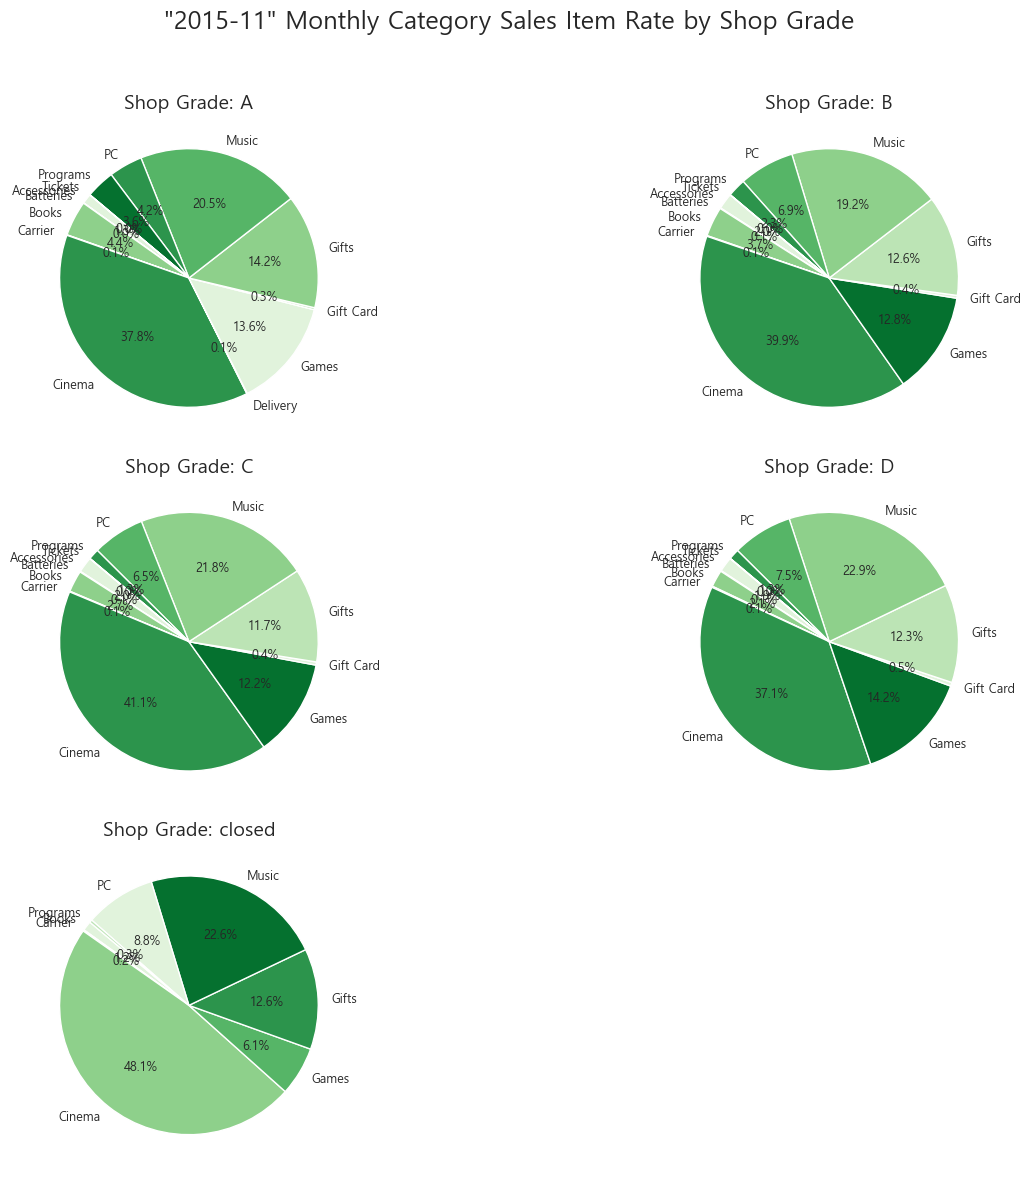

In [57]:
# 1. ÎÇ†Ïßú Ï≤òÎ¶¨
# df_train['year_month'] = df_train['date'].dt.to_period('M').astype(str)

# 2. 11ÏõîÎßå ÌïÑÌÑ∞ÎßÅ
# november = df_train[df_train['year_month'] == '2015-11']

# 3. Îß§Ïû•Î≥Ñ 11Ïõî ÏõîÍ∞Ñ ÌåêÎß§Îüâ Í≥ÑÏÇ∞ (item_cnt_day Ìï©ÏÇ∞)
grade_category_monthly_sales = (
    november
    .groupby(['sub_category', 'shop_grade'])['item_name_translated']
    .nunique()
    .reset_index(name='monthly_sales')
)

import math

grades = sorted(grade_category_monthly_sales['shop_grade'].unique())
n_grades = len(grades)

# Ìñâ, Ïó¥ Í∞úÏàò Í≥ÑÏÇ∞ (Ïòà: ÏµúÎåÄ 2Ïó¥, ÌñâÏùÄ ÌïÑÏöîÌïú ÎßåÌÅº)
n_cols = 2
n_rows = math.ceil(n_grades / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 4 * n_rows))
axes = axes.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

# colors = sns.color_palette('BuPu_r',len(grade_category_monthly_sales['sub_category'])) ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 
colors = sns.color_palette('Greens') ## ÎùºÎ≤®Ïùò Í∞úÏàò ÎßåÌÅº ÏÉâÏÉÅ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± 

for i, grade in enumerate(grades):
    data = grade_category_monthly_sales[grade_category_monthly_sales['shop_grade'] == grade]
    data = data[data['monthly_sales'] > 0]
    sales = data['monthly_sales']
    categories = data['sub_category']

    axes[i].pie(
        sales,
        labels=categories,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9},
        colors = colors  
    )
    axes[i].set_title(f'Shop Grade: {grade}', fontsize=14)

# ÎÇ®Îäî subplotÏùÄ ÏÇ≠Ï†ú
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('"2015-11" Monthly Category Sales Item Rate by Shop Grade', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


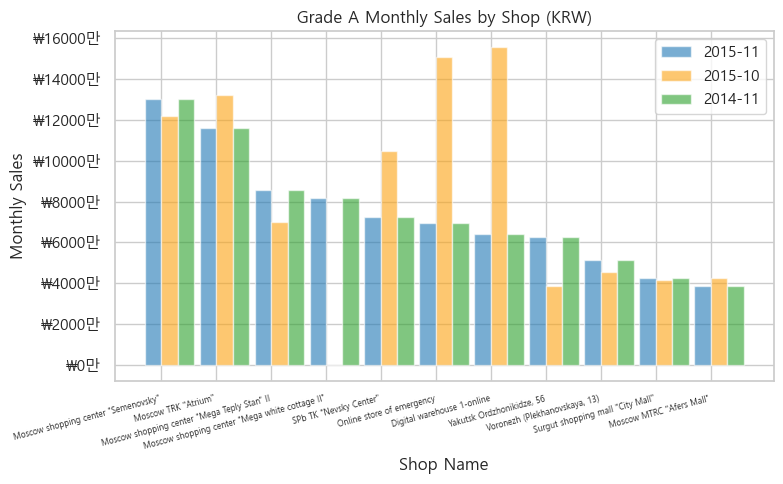

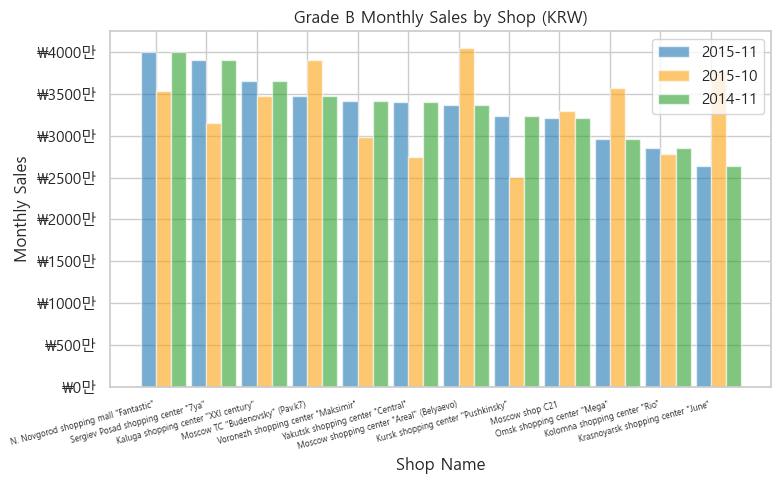

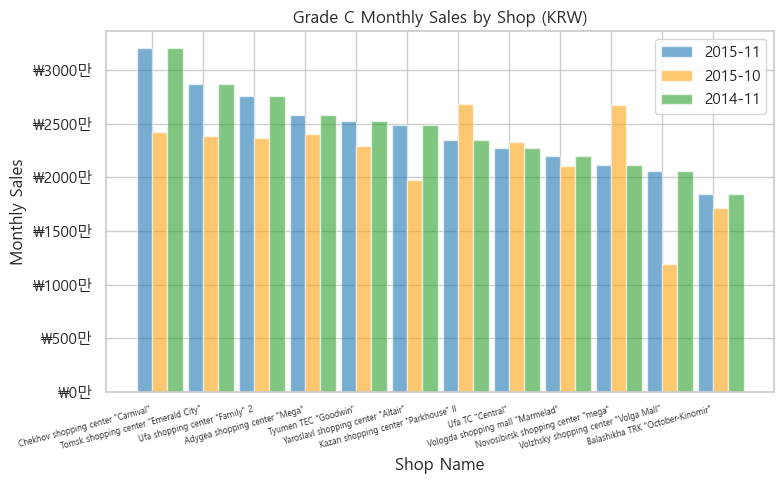

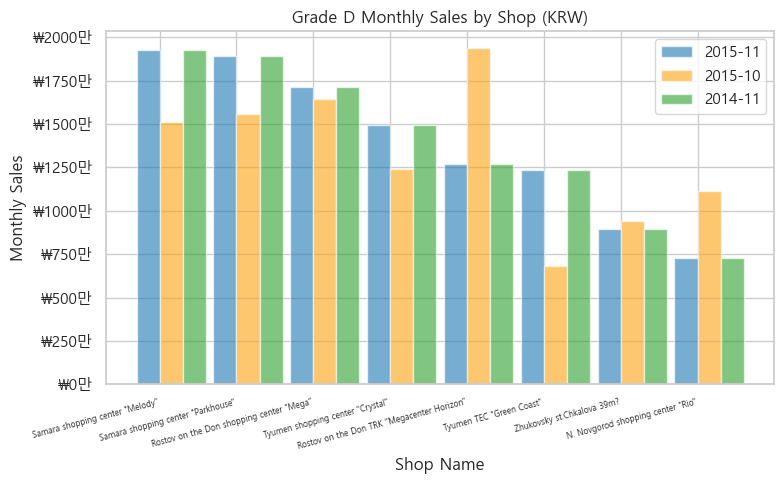

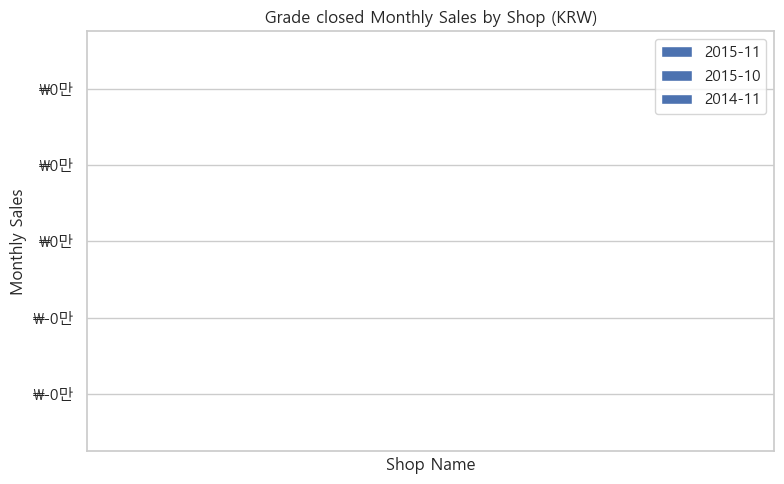

In [58]:
# Ï≤úÎßåÏõê Ïõê Îã®ÏúÑ Ìè¨Îß∑ÌÑ∞
def format_to_1k(x, pos):
    return f'‚Ç©{x * 1e-4:.0f}Îßå'  # M for ÎßåÏõê Îã®ÏúÑÎ°ú Í∞ÑÏ£º

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

for g in grades:
    # Ìï¥Îãπ gradeÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    this_data = this_grade_monthly_sales[this_grade_monthly_sales['shop_grade'] == g]
    last_data = last_grade_monthly_sales[last_grade_monthly_sales['shop_grade'] == g]
    year_data = year_grade_monthly_sales[year_grade_monthly_sales['shop_grade'] == g]

    # Îß§Ïû•Î≥Ñ Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
    this_store_sales = this_data.groupby('shop_name')['monthly_sales'].sum().reset_index()
    last_store_sales = last_data.groupby('shop_name')['monthly_sales'].sum().reset_index()
    year_store_sales = year_data.groupby('shop_name')['monthly_sales'].sum().reset_index()

    # ÌåêÎß§Îüâ Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
    this_store_sales = this_store_sales.sort_values(by='monthly_sales', ascending=False)
    last_store_sales = last_store_sales.sort_values(by='monthly_sales', ascending=False)
    year_store_sales = year_store_sales.sort_values(by='monthly_sales', ascending=False)

    # Í≥µÌÜµ Îß§Ïû• Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï© (Îëò Îã§ Ï°¥Ïû¨ÌïòÎäî Îß§Ïû•Îßå ÏÇ¨Ïö©)
    year_store_sales = year_store_sales.rename(columns={'monthly_sales': 'monthly_sales_year'})
    merged = pd.merge(this_store_sales, last_store_sales, on='shop_name', suffixes=('_this', '_last'))
    merged = pd.merge(merged, year_store_sales, on='shop_name')
    merged = merged.head(14)  # top 14Îßå ÏãúÍ∞ÅÌôî

    fig, ax = plt.subplots(figsize=(8, 5))
    bar_width = 0.3
    index = np.arange(len(merged))

    plt.bar(index, merged['monthly_sales_this'], bar_width, alpha=0.6, color='#1f77b4', label='2015-11')
    plt.bar(index + bar_width, merged['monthly_sales_last'], bar_width, alpha=0.6, color='#fca311', label='2015-10')
    plt.bar(index + 2 * bar_width, merged['monthly_sales_year'], bar_width, alpha=0.6, color='#2ca02c', label='2014-11')

    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_1k))
    plt.xticks(index + bar_width/2, merged['shop_name'], rotation=15, ha='right', fontsize=6)
    plt.title(f'Grade {g} Monthly Sales by Shop (KRW)')
    plt.xlabel('Shop Name')
    plt.ylabel('Monthly Sales')
    plt.legend(loc=0)
    plt.tight_layout()
    plt.show()
